# Notebook Exploratorio

# Importación de librerias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

# Cargo el nuevo dataset una vez limpiados los datos

In [3]:
df = pd.read_csv(r"C:\Users\Victor\Desktop\EDA_Victor_Bandin\src\data\df_EDA_Victor_Bandin.csv")

# Hipotesis

En los países desarrollados la propia prosperidad y la cultura empresarial impulsa la iniciativa privada, mientras en los países menos desarrollados la corrupción y la falta de recursos económicos y educativos de su población reduce dicha iniciativa y los estados concentran la gestión de los activos económicos.

La globalización, los bajos tipos de interés y la financiarización de las economías más desarrolladas han impulsado los mercados bursátiles de las economías emergentes.

Las crisis globales más importantes han tenido un impacto en la evolución de los indicadores de desarrollo analizados.

# Compruebo si hay correlaciones

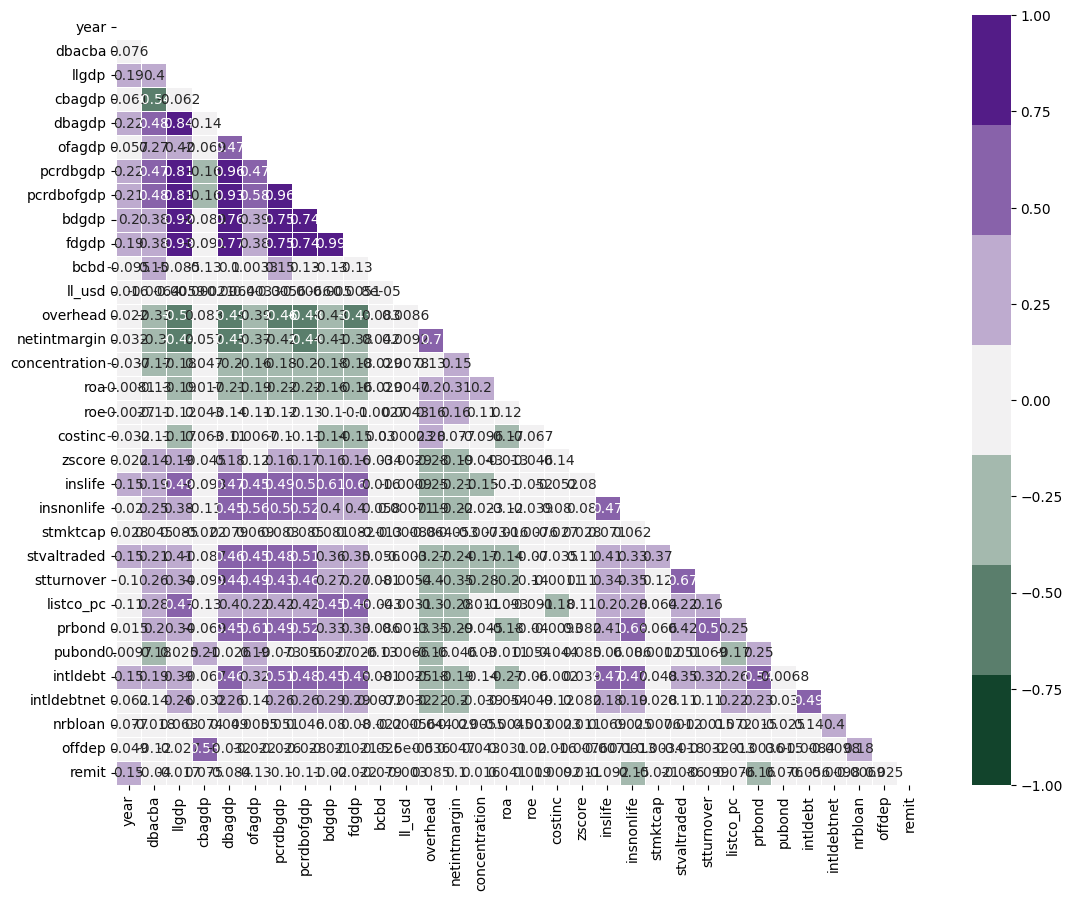

In [9]:
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(df.iloc[df.index,:].corr(),
            annot=True,
            linewidths=0.5,
            vmin=-1,vmax=1,mask=np.triu(df.iloc[df.index,:].corr()),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7));

* La mayoría de los indicadores están altamente correlacionados.
* La mayoría de las veces la correlación se explica porque son valores relativos en relación al PIB.
* En otros casos, la correlación se explica porque ambos indicadores se retroalimentan (ejem: volumen de negociación bursátil y actividad bancaria privada) 


In [16]:
# Media por paises durante los años estudiados
mean_country = df[['cn','cncode','region','incgr', 'dbacba','llgdp','cbagdp','dbagdp','ofagdp','pcrdbgdp','pcrdbofgdp','bdgdp',
          'fdgdp','bcbd','ll_usd','overhead','netintmargin','concentration','roa','roe','costinc','zscore','inslife',
          'insnonlife','stmktcap','stvaltraded','stturnover','listco_pc','prbond','pubond','intldebt','intldebtnet','nrbloan',
          'offdep','remit']].groupby(['cn']).mean()
mean_country = mean_country.reset_index()
mean_country=mean_country.sort_values(by=['dbacba'],ascending=False)
mean_country.head(10)

,cn,dbacba,llgdp,cbagdp,dbagdp,ofagdp,pcrdbgdp,pcrdbofgdp,bdgdp,fdgdp,...,stvaltraded,stturnover,listco_pc,prbond,pubond,intldebt,intldebtnet,nrbloan,offdep,remit
175,Switzerland,99.069533,119.306888,1.584734,128.621792,68.077466,121.783371,123.842937,98.173466,98.233508,...,84.601227,73.770484,0.276840,40.389249,30.952058,29.390445,1.316727,56.291938,12.728640,0.461236
131,Netherlands,98.883656,77.822538,0.632929,93.564277,52.158135,76.230862,77.552268,69.409276,69.421861,...,55.518350,78.139369,0.192591,42.385720,40.316161,43.397754,1.748153,41.421014,13.163750,0.381142
10,Austria,98.530996,68.451806,0.815783,89.979728,27.606750,72.143870,72.439117,66.070473,66.083057,...,18.668954,56.957154,0.187084,38.279441,35.103288,33.118896,1.194657,25.684114,6.213301,0.474206
62,Finland,98.312005,47.891624,0.783696,57.740000,27.606750,55.126029,55.273653,43.515921,44.094917,...,46.055965,69.091686,0.226630,34.747551,30.360689,28.512580,1.104274,25.215402,6.633665,0.271547
68,Germany,98.124329,68.997612,1.560200,102.220291,27.606750,82.864311,83.307181,62.815803,62.834679,...,33.748222,83.392422,0.167592,41.729496,35.898109,30.277739,1.180112,25.908026,7.498752,0.265975
113,Malaysia,98.034155,81.776592,1.216851,82.056802,7.802453,66.884296,66.884296,70.221233,70.217237,...,35.577741,31.024888,0.148410,18.567736,29.057328,9.520590,0.322468,9.837431,5.502587,0.793785
63,France,97.099176,65.886175,1.279593,74.033128,29.145268,64.100617,77.919862,50.763606,58.827788,...,36.031826,68.233305,0.186056,41.655710,39.976300,25.235939,1.184711,28.919740,6.927329,0.425078
85,Ireland,96.413201,76.150235,1.932305,75.590345,23.295500,66.366770,73.389780,60.260040,69.764215,...,25.791941,61.008085,0.216528,42.403497,33.566558,43.151086,2.180756,76.646847,20.191262,0.411590
90,Japan,96.191916,153.449767,6.383409,162.587676,45.505072,122.302459,145.759933,141.444689,141.428217,...,40.652103,69.442705,0.227126,41.011132,62.958637,14.748477,1.016510,21.397783,4.936232,0.214241
61,Fiji,95.332631,39.734965,1.582980,35.970461,6.552506,26.919741,27.255888,33.704018,33.678371,...,11.408332,22.486736,0.060569,7.219645,23.420141,3.761920,0.230213,4.993354,6.363257,2.210043


In [15]:
mean_country.tail(10)

,cn,dbacba,llgdp,cbagdp,dbagdp,ofagdp,pcrdbgdp,pcrdbofgdp,bdgdp,fdgdp,...,stvaltraded,stturnover,listco_pc,prbond,pubond,intldebt,intldebtnet,nrbloan,offdep,remit
188,Uganda,53.194973,17.637432,9.642294,12.886283,3.450020,9.088828,8.033250,12.803045,12.844707,...,0.491463,2.366238,0.018879,14.138269,41.524384,5.507440,0.259271,4.245955,42.614076,1.820577
22,Bolivia,52.177769,26.984593,15.201494,24.155412,4.239480,23.131339,23.506855,19.065936,19.092083,...,0.894220,2.800626,0.043971,3.885260,17.999697,7.605783,0.452388,9.167294,23.505391,1.604895
176,Syrian Arab Republic,51.582161,47.407319,27.775735,30.574571,6.644979,11.051036,11.453409,23.784290,23.974036,...,3.023145,13.194300,0.047496,7.055418,77.993950,2.880660,1.483430,6.928840,17.209914,3.453403
69,Ghana,46.914394,20.168262,16.101107,13.000871,3.450020,7.483198,7.291275,12.905623,12.914894,...,0.517171,2.422224,0.018478,14.138269,41.524384,5.103085,0.313888,8.395835,45.053316,0.558161
159,Sierra Leone,45.606728,16.422223,18.264788,8.449337,3.450020,4.975002,4.879041,9.979299,9.981617,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.507440,0.259271,4.715519,63.461175,1.009893
41,"Congo, Dem. Rep.",40.698505,12.013160,6.629427,5.614350,2.924862,4.268566,3.806246,6.451514,6.498061,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.507440,0.259271,6.346291,208.519224,0.949945
0,Afghanistan,38.548570,35.609748,8.820752,24.763611,1.549470,18.201328,18.453526,25.572552,25.549248,...,2.931130,23.544200,0.059603,0.909930,28.129766,1.529482,0.254631,5.118200,4.838772,2.910730
104,Liberia,37.891561,24.033183,31.426675,17.333689,3.450020,13.163522,11.100348,17.221836,17.271668,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.507440,0.259271,1291.758679,3241.263753,1.843565
76,Haiti,36.987333,36.116877,18.567755,9.757335,2.830615,9.055348,9.055348,16.097880,16.103588,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.228320,0.458092,8.217989,23.184700,6.567502
128,Myanmar,36.848454,26.022663,12.829177,19.844466,7.340896,7.858802,8.094105,11.176145,11.275425,...,13.817200,28.311400,0.029735,7.219645,23.420141,3.761920,0.230213,6.021365,6.400480,1.382590


In [27]:
# Media por regiones durante los años estudiados
mean_dbacba_region = df[['region','dbacba']].groupby(['region']).mean()
mean_dbacba_region = mean_dbacba_region.reset_index()
mean_dbacba_region=mean_dbacba_region.sort_values(by=['dbacba'],ascending=False)
mean_dbacba_region

,region,dbacba
3,High-income nonOECD members,93.389270
2,High-income OECD members,92.148191
0,East Asia and Pacific,85.512553
1,Europe and Central Asia,81.200783
4,Latin America & the Caribbean,78.874763
5,Middle East and North Africa,75.590568
7,Sub-Saharan Africa,69.377401
6,South Asia,67.632482


In [ ]:
mean_dbacba_region=mean_dbacba_region.replace({'region': {'High-income OECD members':'OECD',
                                                         'High-income nonOECD members':'HI noOECD', 
                                                         'East Asia and Pacific':'EAsia P', 
                                                         'Europe and Central Asia':'Eu C Asia', 
                                                         'Latin America & the Caribbean':'Latam',
                                                         'Middle East and North Africa':'ME NA',
                                                         'Sub-Saharan Africa':'SA Africa',
                                                         'South Asia':'S Asia'}})

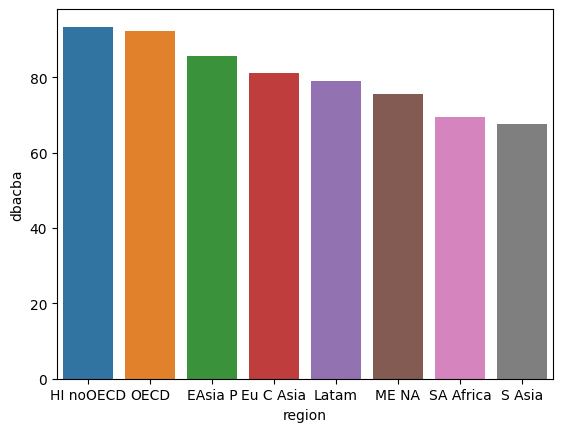

In [25]:
sns.barplot(x='region', y='dbacba', data=mean_dbacba_region);

In [29]:
# Dato por paises durante el primer año estudiados
fYear_country = df[['cn','cncode','year','region','incgr', 'dbacba','llgdp','cbagdp','dbagdp','ofagdp','pcrdbgdp','pcrdbofgdp','bdgdp',
          'fdgdp','bcbd','ll_usd','overhead','netintmargin','concentration','roa','roe','costinc','zscore','inslife',
          'insnonlife','stmktcap','stvaltraded','stturnover','listco_pc','prbond','pubond','intldebt','intldebtnet','nrbloan',
          'offdep','remit']][df.year == 1960]
fYear_country=fYear_country.sort_values(by=['dbacba'],ascending=False)
fYear_country.head(15)

,cn,cncode,year,region,incgr,dbacba,llgdp,cbagdp,dbagdp,ofagdp,...,stvaltraded,stturnover,listco_pc,prbond,pubond,intldebt,intldebtnet,nrbloan,offdep,remit
8925,Switzerland,CHE,1960,High-income OECD members,High-income OECD members,98.83800,71.114270,1.393230,115.269000,1.929400,...,25.612050,66.366770,0.239947,39.570637,37.706990,21.22020,1.135445,24.932301,6.650510,0.445182
3162,Finland,FIN,1960,High-income OECD members,High-income OECD members,98.80700,71.114270,2.781365,36.822000,27.606750,...,25.612050,66.366770,0.239947,39.570637,37.706990,21.22020,1.135445,24.932301,6.650510,0.445182
5763,Malaysia,MYS,1960,East Asia and Pacific,Upper-middle-income economies,98.55270,26.624100,0.092550,8.583590,7.340896,...,13.817200,28.311400,0.029735,7.219645,23.420141,3.76192,0.230213,6.021365,6.400480,1.382590
6681,Netherlands,NLD,1960,High-income OECD members,High-income OECD members,97.76350,52.085400,1.173420,45.068800,37.034500,...,25.612050,66.366770,0.239947,39.570637,37.706990,21.22020,1.135445,24.932301,6.650510,0.445182
2193,Costa Rica,CRI,1960,Latin America & the Caribbean,Upper-middle-income economies,97.67710,19.400500,0.699210,26.032600,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.22832,0.458092,10.282850,26.690901,1.999785
510,Austria,AUT,1960,High-income OECD members,High-income OECD members,97.31800,41.899300,1.194710,40.606100,27.606750,...,25.612050,66.366770,0.239947,39.570637,37.706990,21.22020,1.135445,24.932301,6.650510,0.445182
3519,Ghana,GHA,1960,Sub-Saharan Africa,Lower-middle-income economies,97.24950,24.730560,5.389150,18.747852,3.450020,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.50744,0.259271,5.393790,45.269800,0.949945
4590,Japan,JPN,1960,High-income OECD members,High-income OECD members,95.91410,46.838400,2.680150,52.891200,27.606750,...,25.612050,66.366770,0.239947,39.570637,37.706990,21.22020,1.135445,24.932301,6.650510,0.445182
9996,"Venezuela, RB",VEN,1960,Latin America & the Caribbean,Upper-middle-income economies,95.68740,36.637333,0.786980,18.369800,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.22832,0.458092,10.282850,26.690901,1.999785
6120,Mexico,MEX,1960,Latin America & the Caribbean,Upper-middle-income economies,95.12570,22.025600,1.121790,21.214700,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.22832,0.458092,10.282850,26.690901,1.999785


In [30]:
# Dato por paises durante el último año estudiados
lYear_country = df[['cn','cncode','year','region','incgr', 'dbacba','llgdp','cbagdp','dbagdp','ofagdp','pcrdbgdp','pcrdbofgdp','bdgdp',
          'fdgdp','bcbd','ll_usd','overhead','netintmargin','concentration','roa','roe','costinc','zscore','inslife',
          'insnonlife','stmktcap','stvaltraded','stturnover','listco_pc','prbond','pubond','intldebt','intldebtnet','nrbloan',
          'offdep','remit']][df.year == 2010]
lYear_country=lYear_country.sort_values(by=['dbacba'],ascending=False)
lYear_country.head(10)

,cn,cncode,year,region,incgr,dbacba,llgdp,cbagdp,dbagdp,ofagdp,...,stvaltraded,stturnover,listco_pc,prbond,pubond,intldebt,intldebtnet,nrbloan,offdep,remit
1223,Bosnia and Herzegovina,BIH,2010,Europe and Central Asia,Upper-middle-income economies,99.9999,58.702600,0.000024,57.73510,1.471500,...,1.421165,12.053900,0.053740,0.122302,8.161395,6.06725,0.654860,18.46530,16.717400,11.444600
2345,Croatia,HRV,2010,High-income nonOECD members,High-income nonOECD members,99.9999,69.186000,0.000473,86.03350,9.387320,...,1.983520,4.856220,0.543232,13.201863,18.809900,12.53370,1.307385,52.48170,36.808949,2.160380
6629,Namibia,NAM,2010,Sub-Saharan Africa,Upper-middle-income economies,99.9999,57.650800,0.000042,47.88110,3.450020,...,0.193795,2.452520,0.030658,14.138269,41.524384,5.50744,0.259271,7.04197,45.269800,0.132628
7802,Samoa,WSM,2010,East Asia and Pacific,Lower-middle-income economies,99.9985,49.854100,2.385370,50.60220,7.340896,...,13.817200,28.311400,0.029735,7.219645,23.420141,3.76192,0.230213,489.16000,6.400480,24.112800
1376,Brunei Darussalam,BRN,2010,High-income nonOECD members,High-income nonOECD members,99.9884,75.243866,1.944485,64.95318,9.387320,...,7.530450,15.252050,0.434235,13.201863,15.371000,9.19271,1.307385,8.84420,36.808949,0.804406
8873,Swaziland,SWZ,2010,Sub-Saharan Africa,Lower-middle-income economies,99.9879,29.782500,0.003005,25.36270,3.450020,...,0.560719,2.473905,0.047371,14.138269,41.524384,5.50744,0.259271,4.24599,45.269800,2.947860
6425,Montenegro,MNE,2010,Europe and Central Asia,Upper-middle-income economies,99.9753,47.604300,0.016663,74.83560,1.471500,...,4.179510,0.982048,0.459231,0.122302,8.161395,6.06725,0.654860,35.54030,5.526810,7.316930
2549,Denmark,DNK,2010,High-income OECD members,High-income OECD members,99.9684,87.253700,0.113494,219.72300,27.606750,...,46.129800,77.944300,0.371326,179.378000,31.964200,50.13440,1.135445,60.39400,6.650510,0.202765
8669,St. Lucia,LCA,2010,Latin America & the Caribbean,Upper-middle-income economies,99.9612,92.013700,0.062933,123.66300,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.22832,0.458092,33.61390,26.690901,2.617530
4742,Kazakhstan,KAZ,2010,Europe and Central Asia,Upper-middle-income economies,99.9596,36.797700,0.021210,43.41530,1.471500,...,2.173930,6.201260,0.036757,0.122302,8.161395,27.36420,3.343520,7.40912,11.430800,0.196314


In [31]:
fYear_country.tail(10)

,cn,cncode,year,region,incgr,dbacba,llgdp,cbagdp,dbagdp,ofagdp,...,stvaltraded,stturnover,listco_pc,prbond,pubond,intldebt,intldebtnet,nrbloan,offdep,remit
7089,Pakistan,PAK,1960,South Asia,Lower-middle-income economies,50.4312,36.605648,14.057200,13.528000,1.549470,...,2.931130,23.544200,0.059603,0.909930,28.129766,1.529482,0.254631,6.214133,4.390150,2.910730
7191,Panama,PAN,1960,Latin America & the Caribbean,Upper-middle-income economies,50.3131,16.679200,4.871370,10.508100,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.228320,0.458092,10.282850,26.690901,1.999785
4131,India,IND,1960,South Asia,Lower-middle-income economies,49.7447,23.363600,12.180700,12.402400,1.549470,...,2.931130,23.544200,0.059603,0.909930,28.129766,1.529482,0.254631,6.214133,4.390150,2.910730
0,Afghanistan,AFG,1960,South Asia,Low-income economies,39.1840,36.605648,8.923634,26.232584,1.549470,...,2.931130,23.544200,0.059603,0.909930,28.129766,1.529482,0.254631,6.214133,4.390150,2.910730
6630,Nepal,NPL,1960,South Asia,Low-income economies,38.8621,36.605648,8.923634,26.232584,1.549470,...,2.931130,23.544200,0.059603,0.909930,28.129766,1.529482,0.254631,6.214133,4.390150,2.910730
6528,Myanmar,MMR,1960,East Asia and Pacific,Low-income economies,34.7706,27.272400,12.655800,14.651300,7.340896,...,13.817200,28.311400,0.029735,7.219645,23.420141,3.761920,0.230213,6.021365,6.400480,1.382590
4896,"Korea, Rep.",KOR,1960,High-income OECD members,High-income OECD members,30.3957,71.114270,2.781365,75.611810,27.606750,...,25.612050,66.366770,0.239947,39.570637,37.706990,21.220200,1.135445,24.932301,6.650510,0.445182
3009,Ethiopia,ETH,1960,Sub-Saharan Africa,Low-income economies,17.7092,24.730560,5.389150,18.747852,3.450020,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.507440,0.259271,5.393790,45.269800,0.949945
3876,Haiti,HTI,1960,Latin America & the Caribbean,Low-income economies,17.2191,36.637333,10.000500,1.384470,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.228320,0.458092,10.282850,26.690901,1.999785
1122,Bolivia,BOL,1960,Latin America & the Caribbean,Lower-middle-income economies,10.2146,36.637333,4.871370,33.492670,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.228320,0.458092,10.282850,26.690901,1.999785


In [32]:
lYear_country.tail(10)

,cn,cncode,year,region,incgr,dbacba,llgdp,cbagdp,dbagdp,ofagdp,...,stvaltraded,stturnover,listco_pc,prbond,pubond,intldebt,intldebtnet,nrbloan,offdep,remit
9638,Uganda,UGA,2010,Sub-Saharan Africa,Low-income economies,65.1184,23.04370,10.24150,19.757900,3.450020,...,0.056037,0.566467,0.002393,14.138269,41.524384,5.50744,0.259271,3.081860,45.269800,5.317680
2702,Dominican Republic,DOM,2010,Latin America & the Caribbean,Upper-middle-income economies,61.9604,31.35070,15.26190,24.221300,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,4.53116,0.458092,7.154460,26.690901,6.531340
5762,Malawi,MWI,2010,Sub-Saharan Africa,Low-income economies,59.5360,24.70840,13.83960,18.267300,3.450020,...,0.379078,2.351490,0.009395,14.138269,41.524384,5.50744,0.259271,4.412220,20.807600,0.949945
2957,Eritrea,ERI,2010,Sub-Saharan Africa,Low-income economies,55.0121,24.73056,5.38915,18.747852,3.450020,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.50744,0.259271,0.047236,45.269800,0.949945
1886,Chad,TCD,2010,Sub-Saharan Africa,Low-income economies,53.9201,24.73056,5.38915,18.747852,3.450020,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.50744,0.259271,0.679103,45.269800,0.949945
6884,Nicaragua,NIC,2010,Latin America & the Caribbean,Lower-middle-income economies,49.6968,41.60560,38.19680,35.849500,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.22832,0.458092,7.343800,26.690901,12.484500
1835,Central African Republic,CAF,2010,Sub-Saharan Africa,Low-income economies,48.3695,16.86040,10.69000,9.259180,3.450020,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.50744,0.259271,0.352690,44.127600,0.949945
5354,Liberia,LBR,2010,Sub-Saharan Africa,Low-income economies,43.2850,24.73056,5.38915,18.747852,3.450020,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.50744,0.259271,2538.410000,45.269800,2.707380
3926,Haiti,HTI,2010,Latin America & the Caribbean,Low-income economies,42.5436,44.27310,20.31890,15.811700,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.22832,0.458092,2.306100,26.690901,22.588700
6578,Myanmar,MMR,2010,East Asia and Pacific,Low-income economies,24.0372,19.74720,13.54270,3.813180,7.340896,...,13.817200,28.311400,0.029735,7.219645,23.420141,3.76192,0.230213,6.021365,6.400480,1.382590


In [27]:
# Media por nivel de ingresos durante el ultimo año estudiado
lYear_country_dbacba_incgr = lYear_country[['incgr','dbacba']].groupby(['incgr']).mean()
lYear_country_dbacba_incgr = lYear_country_dbacba_incgr.reset_index()
lYear_country_dbacba_incgr=lYear_country_dbacba_incgr.sort_values(by=['dbacba'],ascending=False)
lYear_country_dbacba_incgr

,incgr,dbacba
0,High-income OECD members,96.054413
1,High-income nonOECD members,94.467529
4,Upper-middle-income economies,91.258629
3,Lower-middle-income economies,87.504524
2,Low-income economies,73.970642


In [28]:
# Media por nivel de ingresos durante el primer año estudiado
fYear_country_dbacba_incgr = fYear_country[['incgr','dbacba']].groupby(['incgr']).mean()
fYear_country_dbacba_incgr = fYear_country_dbacba_incgr.reset_index()
fYear_country_dbacba_incgr=fYear_country_dbacba_incgr.sort_values(by=['dbacba'],ascending=False)
fYear_country_dbacba_incgr

,incgr,dbacba
1,High-income nonOECD members,92.785492
0,High-income OECD members,84.393379
4,Upper-middle-income economies,78.756317
3,Lower-middle-income economies,76.364136
2,Low-income economies,64.902245


In [29]:
fVslYear_dbacba_incgr = pd.concat([fYear_country_dbacba_incgr.sort_values(by=['incgr'],ascending=False).rename({'dbacba': '1960'}, axis=1), lYear_country_dbacba_incgr.sort_values(by=['incgr'],ascending=False)['dbacba']], axis=1,)
fVslYear_dbacba_incgr=fVslYear_dbacba_incgr.rename({'dbacba': '2010'}, axis=1)
fVslYear_dbacba_incgr

,incgr,1960,2010
4,Upper-middle-income economies,78.756317,91.258629
3,Lower-middle-income economies,76.364136,87.504524
2,Low-income economies,64.902245,73.970642
1,High-income nonOECD members,92.785492,94.467529
0,High-income OECD members,84.393379,96.054413


In [30]:
mean_dbacba_incgr = df[['incgr','dbacba']].groupby('incgr').mean()['dbacba'].reset_index()
mean_dbacba_incgr=mean_dbacba_incgr.rename({'dbacba': 'Media'}, axis=1)
mean_dbacba_incgr=mean_dbacba_incgr.sort_values(by=['incgr'],ascending=False)

fVslYear_dbacba_incgr = pd.concat([fVslYear_dbacba_incgr, mean_dbacba_incgr['Media']], axis=1,)
fVslYear_dbacba_incgr=fVslYear_dbacba_incgr.sort_values(by=['2010'],ascending=False)
fVslYear_dbacba_incgr=fVslYear_dbacba_incgr.replace({'incgr': {'High-income OECD members':'H Inc OECD',
                                                               'High-income nonOECD members':'H Inc no OECD', 
                                                               'Upper-middle-income economies':'U-M Inc', 
                                                               'Lower-middle-income economies':'L-M Inc', 
                                                               'Low-income economies':'Low Inc'}})
fVslYear_dbacba_incgr=fVslYear_dbacba_incgr.set_index('incgr')

In [31]:
fVslYear_dbacba_incgr

,1960,2010,Media
incgr,,,
H Inc OECD,84.393379,96.054413,92.148193
H Inc no OECD,92.785492,94.467529,93.389259
U-M Inc,78.756317,91.258629,82.767265
L-M Inc,76.364136,87.504524,76.551849
Low Inc,64.902245,73.970642,66.427032


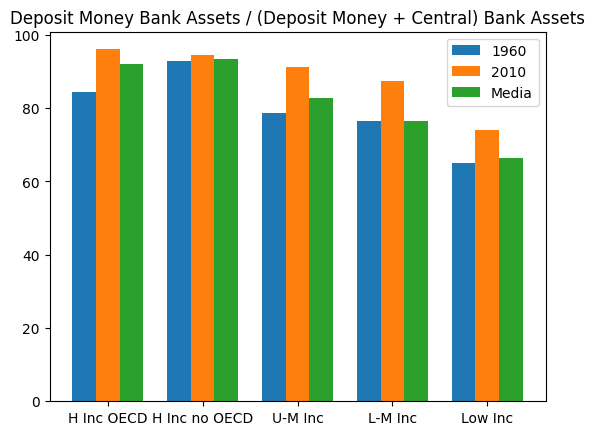

In [32]:
import numpy as np
n = len(fVslYear_dbacba_incgr.index)
x = np.arange(n)
width = 0.25
plt.bar(x - width, fVslYear_dbacba_incgr['1960'], width=width, label='1960')
plt.bar(x, fVslYear_dbacba_incgr['2010'], width=width, label='2010')
plt.bar(x + width, fVslYear_dbacba_incgr.Media, width=width, label='Media')
plt.xticks(x, fVslYear_dbacba_incgr.index)
plt.legend(loc='best')
plt.title('Deposit Money Bank Assets / (Deposit Money + Central) Bank Assets')
plt.show()

In [34]:
# Dato por paises durante el primer y último año estudiados
CompareYear_country = df[['cn','cncode','year','region','incgr', 'dbacba','llgdp','cbagdp','dbagdp','ofagdp','pcrdbgdp','pcrdbofgdp','bdgdp',
          'fdgdp','bcbd','ll_usd','overhead','netintmargin','concentration','roa','roe','costinc','zscore','inslife',
          'insnonlife','stmktcap','stvaltraded','stturnover','listco_pc','prbond','pubond','intldebt','intldebtnet','nrbloan',
          'offdep','remit']][(df.year == 1960) | (df.year == 2010)]
CompareYear_country=CompareYear_country.sort_values(by=['dbacba'],ascending=False)
CompareYear_country.tail(10)

,cn,cncode,year,region,incgr,dbacba,llgdp,cbagdp,dbagdp,ofagdp,...,stvaltraded,stturnover,listco_pc,prbond,pubond,intldebt,intldebtnet,nrbloan,offdep,remit
5354,Liberia,LBR,2010,Sub-Saharan Africa,Low-income economies,43.2850,24.730560,5.389150,18.747852,3.450020,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.507440,0.259271,2538.410000,45.269800,2.707380
3926,Haiti,HTI,2010,Latin America & the Caribbean,Low-income economies,42.5436,44.273100,20.318900,15.811700,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.228320,0.458092,2.306100,26.690901,22.588700
0,Afghanistan,AFG,1960,South Asia,Low-income economies,39.1840,36.605648,8.923634,26.232584,1.549470,...,2.931130,23.544200,0.059603,0.909930,28.129766,1.529482,0.254631,6.214133,4.390150,2.910730
6630,Nepal,NPL,1960,South Asia,Low-income economies,38.8621,36.605648,8.923634,26.232584,1.549470,...,2.931130,23.544200,0.059603,0.909930,28.129766,1.529482,0.254631,6.214133,4.390150,2.910730
6528,Myanmar,MMR,1960,East Asia and Pacific,Low-income economies,34.7706,27.272400,12.655800,14.651300,7.340896,...,13.817200,28.311400,0.029735,7.219645,23.420141,3.761920,0.230213,6.021365,6.400480,1.382590
4896,"Korea, Rep.",KOR,1960,High-income OECD members,High-income OECD members,30.3957,71.114270,2.781365,75.611810,27.606750,...,25.612050,66.366770,0.239947,39.570637,37.706990,21.220200,1.135445,24.932301,6.650510,0.445182
6578,Myanmar,MMR,2010,East Asia and Pacific,Low-income economies,24.0372,19.747200,13.542700,3.813180,7.340896,...,13.817200,28.311400,0.029735,7.219645,23.420141,3.761920,0.230213,6.021365,6.400480,1.382590
3009,Ethiopia,ETH,1960,Sub-Saharan Africa,Low-income economies,17.7092,24.730560,5.389150,18.747852,3.450020,...,0.560719,2.473905,0.022564,14.138269,41.524384,5.507440,0.259271,5.393790,45.269800,0.949945
3876,Haiti,HTI,1960,Latin America & the Caribbean,Low-income economies,17.2191,36.637333,10.000500,1.384470,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.228320,0.458092,10.282850,26.690901,1.999785
1122,Bolivia,BOL,1960,Latin America & the Caribbean,Lower-middle-income economies,10.2146,36.637333,4.871370,33.492670,2.830615,...,1.162330,3.576090,0.051722,3.885260,17.999697,8.228320,0.458092,10.282850,26.690901,1.999785


In [34]:
CompareYear_country.groupby('region').mean()

,year,dbacba,llgdp,cbagdp,dbagdp,ofagdp,pcrdbgdp,pcrdbofgdp,bdgdp,fdgdp,...,roa,roe,costinc,zscore,inslife,insnonlife,stmktcap,stvaltraded,stturnover,listco_pc
region,,,,,,,,,,,,,,,,,,,,,
East Asia and Pacific,1985.0,85.607399,45.236450,2.980177,44.607372,7.075406,31.891024,33.659546,25.885059,25.790426,...,1.370906,13.228147,54.821095,20.243555,1.115955,0.991090,40.527307,17.355711,35.492840,0.065795
Europe and Central Asia,1985.0,85.967957,34.779003,2.663252,37.165245,1.363748,24.922758,28.622593,20.456362,20.476988,...,1.391113,10.442521,59.158669,14.036716,0.217796,1.382690,14.647223,3.401300,18.306103,0.140260
High-income OECD members,1985.0,90.223892,83.167336,3.852082,93.755844,27.627050,78.151947,86.900627,73.304543,73.282913,...,0.407668,6.232873,60.273277,20.734451,3.629914,3.160972,64.962391,40.580616,74.323280,0.269837
High-income nonOECD members,1985.0,93.626518,84.264305,2.125505,73.632141,9.736789,62.829224,68.989372,73.584343,74.886780,...,1.218210,11.346757,48.536255,24.219681,1.154122,2.161183,68.926057,21.571947,19.292910,0.506592
Latin America & the Caribbean,1985.0,81.247978,43.009399,5.373232,38.562717,3.019064,31.645308,32.904736,26.024818,26.239071,...,1.392008,14.949485,66.143517,16.770245,0.424308,1.574117,22.971714,2.268847,5.720953,0.087941
Middle East and North Africa,1985.0,81.727768,60.706158,8.808086,43.128090,6.251551,24.410948,26.592808,41.885338,43.659004,...,1.077669,10.471649,51.469326,28.179922,0.181996,1.186044,28.585197,6.043368,17.185038,0.062879
South Asia,1985.0,70.006561,43.670818,8.089540,34.529278,1.504796,25.521069,25.758738,28.300079,28.424137,...,1.002273,15.138882,54.320732,14.647518,0.751534,0.533566,20.328831,7.914411,42.212109,0.057976
Sub-Saharan Africa,1985.0,74.626106,29.321907,4.918292,22.743862,3.568030,17.388010,16.642323,18.497110,18.545935,...,1.914193,21.851946,60.283905,15.202636,0.920508,1.733712,18.060000,1.723754,3.598862,0.030828


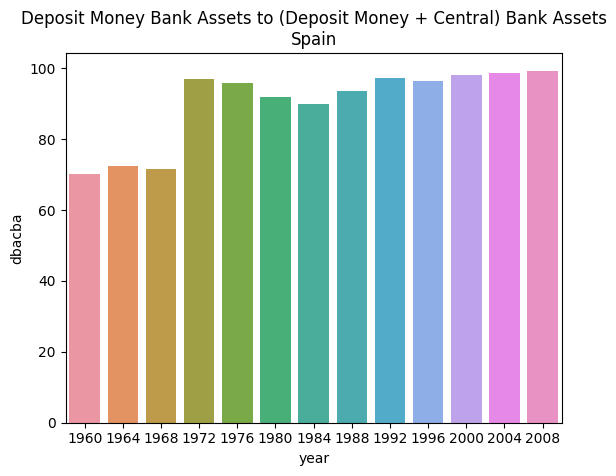

In [38]:
sns.barplot(x='year', y='dbacba', data=df[['year','dbacba']][(df.cn=='Spain')&(df.year%4==0)]).set(title = 'Deposit Money Bank Assets to (Deposit Money + Central) Bank Assets\nSpain');

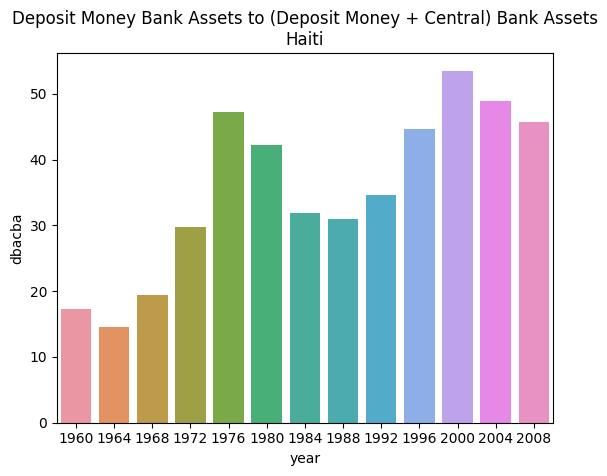

In [39]:
sns.barplot(x='year', y='dbacba', data=df[['year','dbacba']][(df.cn=='Haiti')&(df.year%4==0)]).set(title = 'Deposit Money Bank Assets to (Deposit Money + Central) Bank Assets\nHaiti');

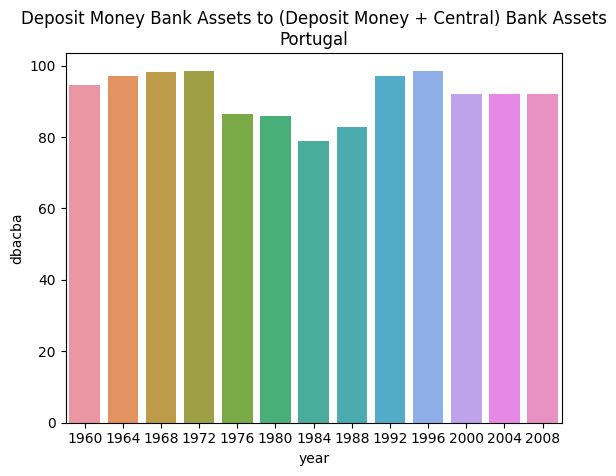

In [40]:
sns.barplot(x='year', y='dbacba', data=df[['year','dbacba']][(df.cn=='Portugal')&(df.year%4==0)]).set(title = 'Deposit Money Bank Assets to (Deposit Money + Central) Bank Assets\nPortugal');

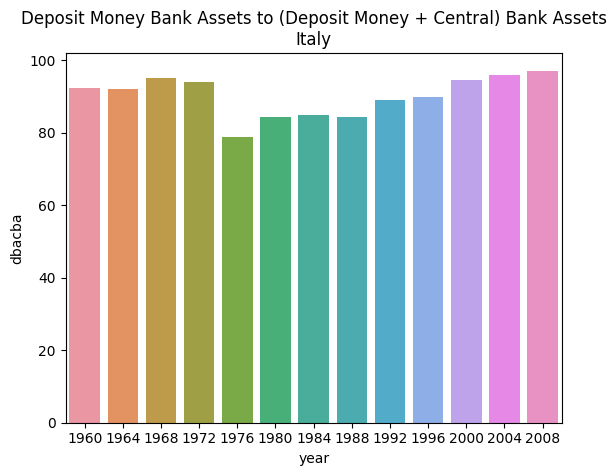

In [41]:
sns.barplot(x='year', y='dbacba', data=df[['year','dbacba']][(df.cn=='Italy')&(df.year%4==0)]).set(title = 'Deposit Money Bank Assets to (Deposit Money + Central) Bank Assets\nItaly');

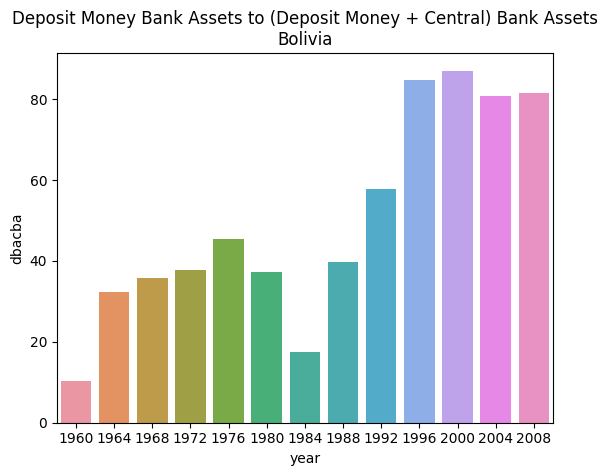

In [42]:
sns.barplot(x='year', y='dbacba', data=df[['year','dbacba']][(df.cn=='Bolivia')&(df.year%4==0)]).set(title = 'Deposit Money Bank Assets to (Deposit Money + Central) Bank Assets\nBolivia');

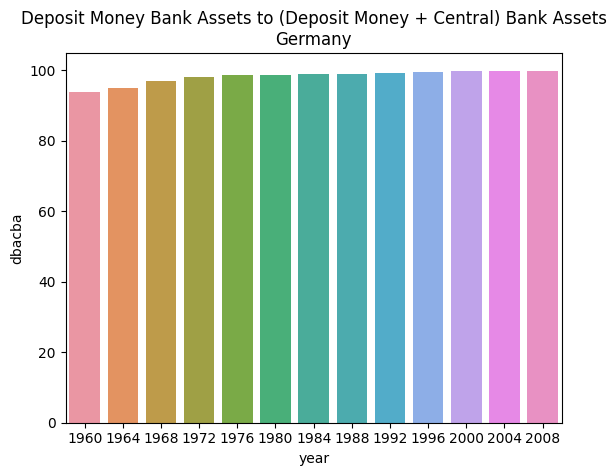

In [43]:
sns.barplot(x='year', y='dbacba', data=df[['year','dbacba']][(df.cn=='Germany')&(df.year%4==0)]).set(title = 'Deposit Money Bank Assets to (Deposit Money + Central) Bank Assets\nGermany');

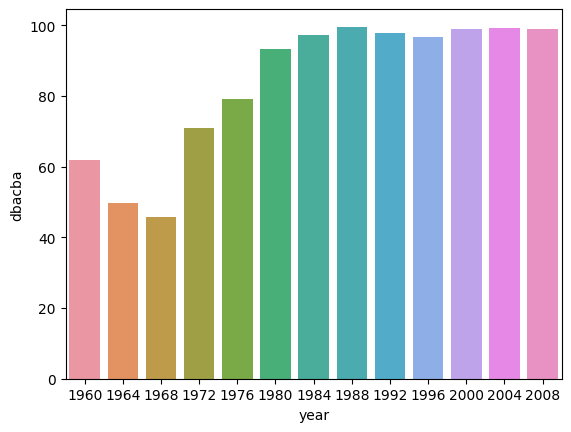

In [41]:
sns.barplot(x='year', y='dbacba', data=df[['year','dbacba']][(df.cn=='United Kingdom')&(df.year%4==0)]);

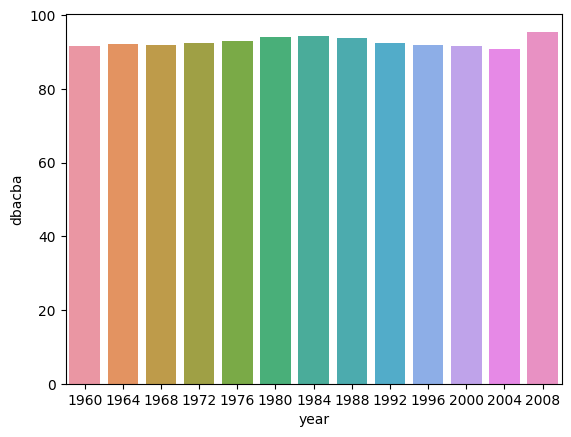

In [42]:
sns.barplot(x='year', y='dbacba', data=df[['year','dbacba']][(df.cn=='United States')&(df.year%4==0)]);

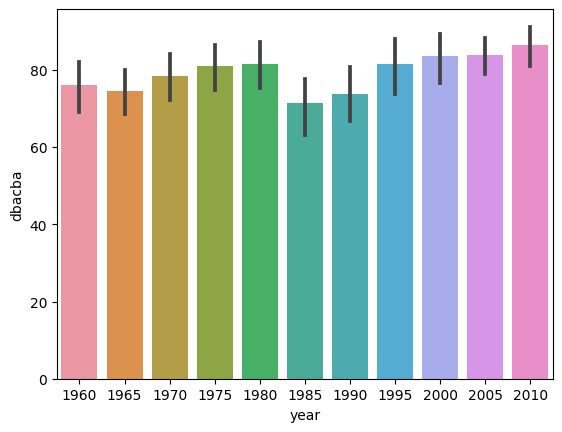

In [43]:
sns.barplot(x=df[['year','region','dbacba']][(df.region=='Latin America & the Caribbean')&(df.year%5==0)].year, y=df.dbacba, data=df[['year','region','dbacba']][(df.region=='Latin America & the Caribbean')&(df.year%5==0)].groupby(['region','year']).mean());

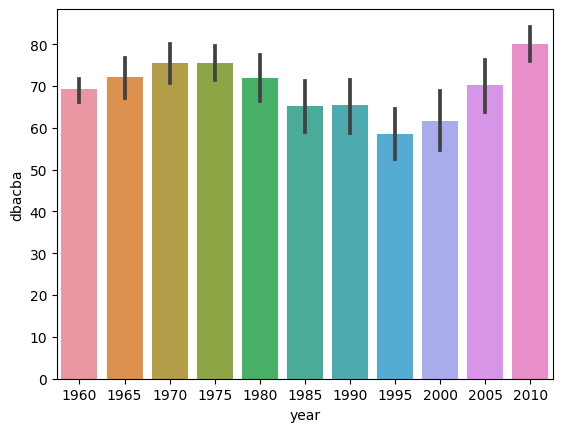

In [44]:
sns.barplot(x=df[['year','region','dbacba']][(df.region=='Sub-Saharan Africa')&(df.year%5==0)].year, y=df.dbacba, data=df[['year','region','dbacba']][(df.region=='Sub-Saharan Africa')&(df.year%5==0)].groupby(['region','year']).mean());

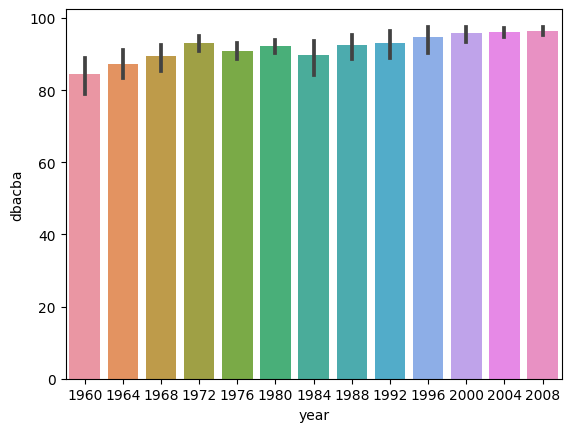

In [45]:
sns.barplot(x=df[['year','region','dbacba']][(df.region=='High-income OECD members')&(df.year%4==0)].year, y=df.dbacba, data=df[['year','region','dbacba']][(df.region=='High-income OECD members')&(df.year%4==0)].groupby(['region','year']).mean());

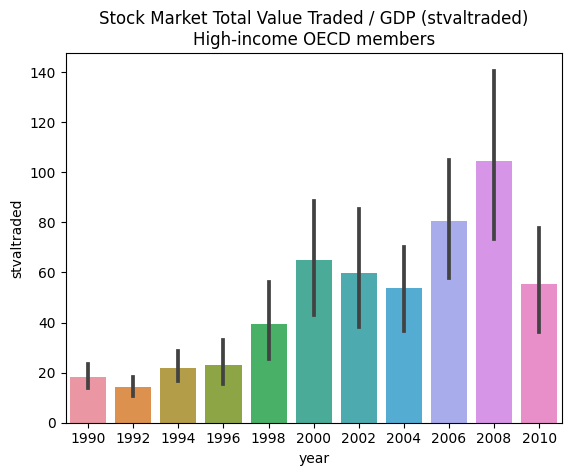

In [46]:
sns.barplot(x=df[['year','region','stvaltraded']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stvaltraded']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].stvaltraded, data=df[['year','region','stvaltraded']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Total Value Traded / GDP (stvaltraded)\nHigh-income OECD members');

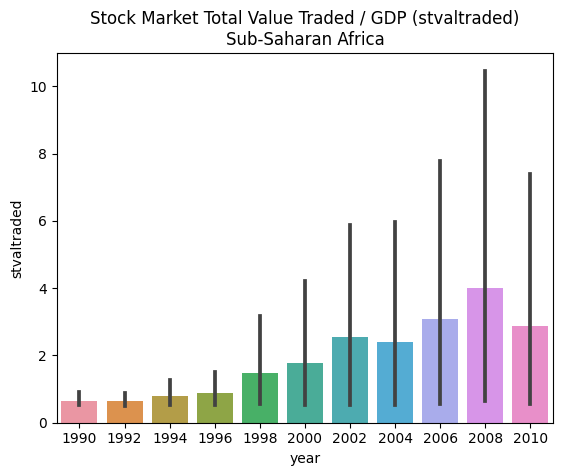

In [47]:
sns.barplot(x=df[['year','region','stvaltraded']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stvaltraded']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].stvaltraded, data=df[['year','region','stvaltraded']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Total Value Traded / GDP (stvaltraded)\nSub-Saharan Africa');

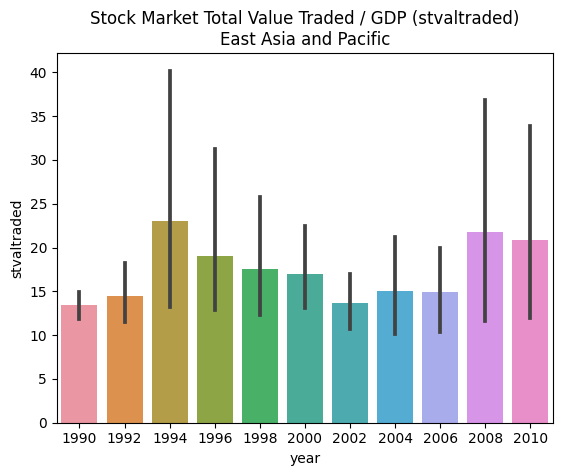

In [48]:
sns.barplot(x=df[['year','region','stvaltraded']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stvaltraded']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].stvaltraded, data=df[['year','region','stvaltraded']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Total Value Traded / GDP (stvaltraded)\nEast Asia and Pacific');

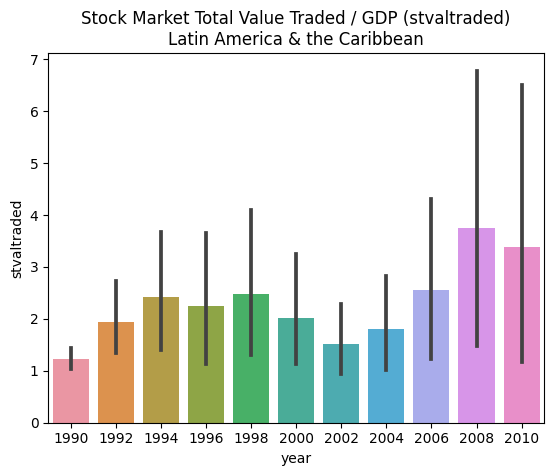

In [49]:
sns.barplot(x=df[['year','region','stvaltraded']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stvaltraded']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].stvaltraded, data=df[['year','region','stvaltraded']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Total Value Traded / GDP (stvaltraded)\nLatin America & the Caribbean');

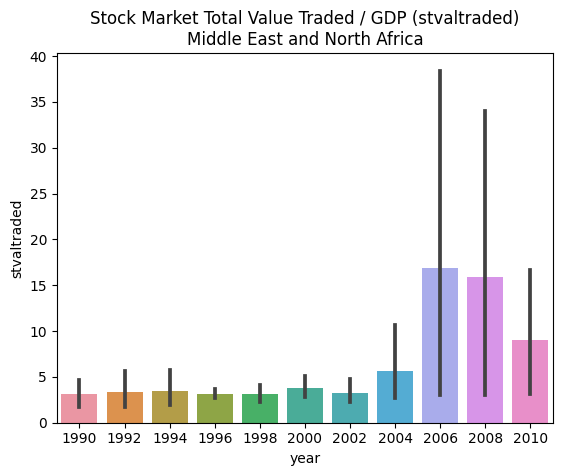

In [50]:
sns.barplot(x=df[['year','region','stvaltraded']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stvaltraded']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].stvaltraded, data=df[['year','region','stvaltraded']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Total Value Traded / GDP (stvaltraded)\nMiddle East and North Africa');

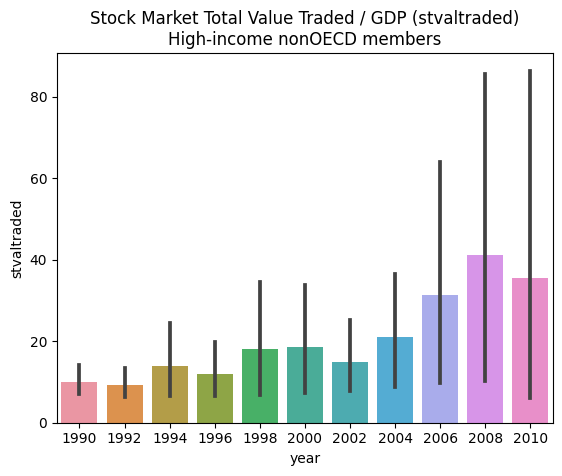

In [51]:
sns.barplot(x=df[['year','region','stvaltraded']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stvaltraded']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].stvaltraded, data=df[['year','region','stvaltraded']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Total Value Traded / GDP (stvaltraded)\nHigh-income nonOECD members');

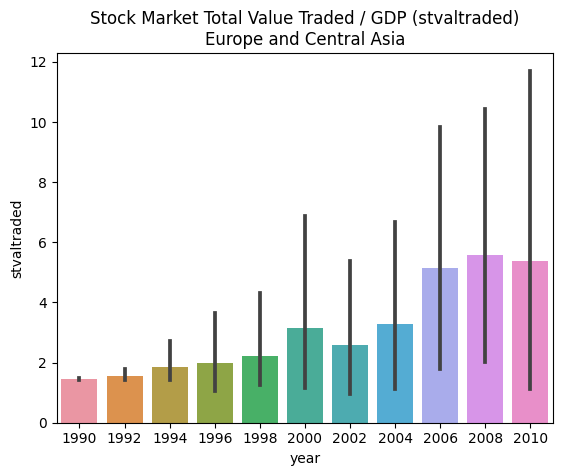

In [52]:
sns.barplot(x=df[['year','region','stvaltraded']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stvaltraded']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].stvaltraded, data=df[['year','region','stvaltraded']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Total Value Traded / GDP (stvaltraded)\nEurope and Central Asia');

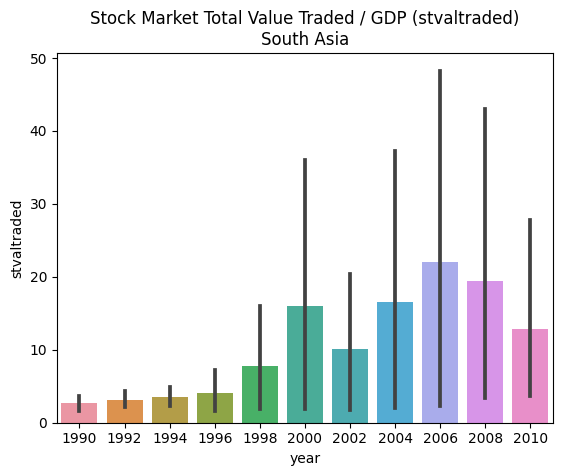

In [53]:
sns.barplot(x=df[['year','region','stvaltraded']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stvaltraded']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].stvaltraded, data=df[['year','region','stvaltraded']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Total Value Traded / GDP (stvaltraded)\nSouth Asia');

Stock Market Turnover Ratio (stturnover) Turnover ratio is the value of domestic shares traded divided by their market capitalization. The value is annualized by multiplying the monthly average by 12.

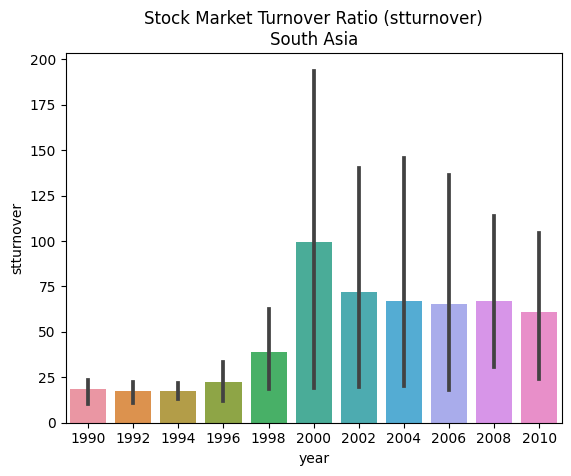

In [54]:
sns.barplot(x=df[['year','region','stturnover']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stturnover']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','region','stturnover']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nSouth Asia');

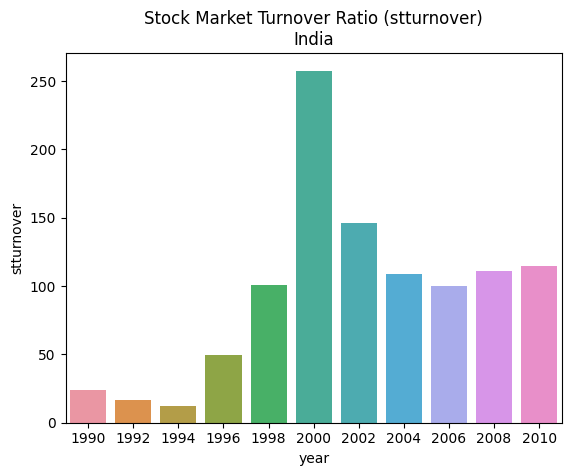

In [55]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='India')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='India')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='India')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nIndia');

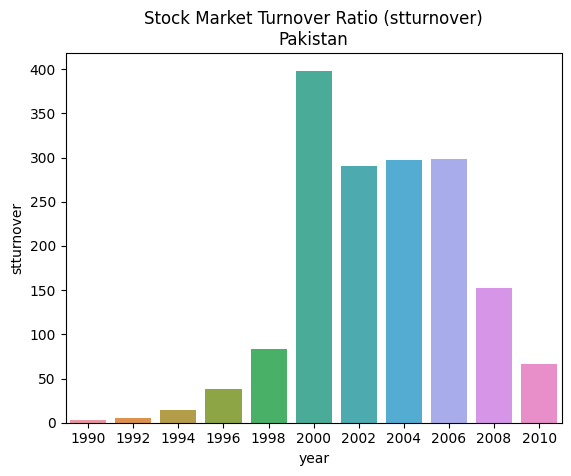

In [56]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Pakistan')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Pakistan')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Pakistan')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nPakistan');

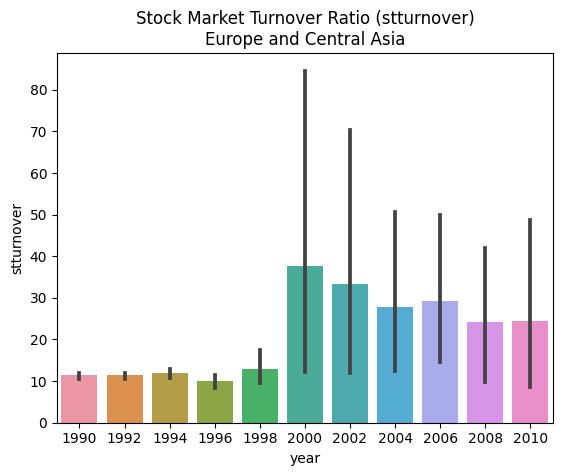

In [57]:
sns.barplot(x=df[['year','region','stturnover']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stturnover']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','region','stturnover']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nEurope and Central Asia');

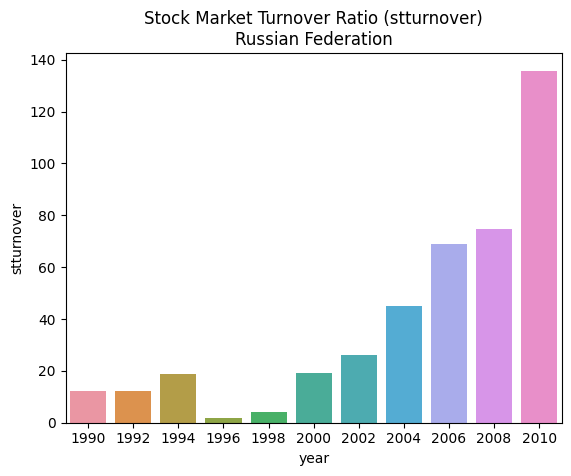

In [58]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Russian Federation')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Russian Federation')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Russian Federation')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nRussian Federation');

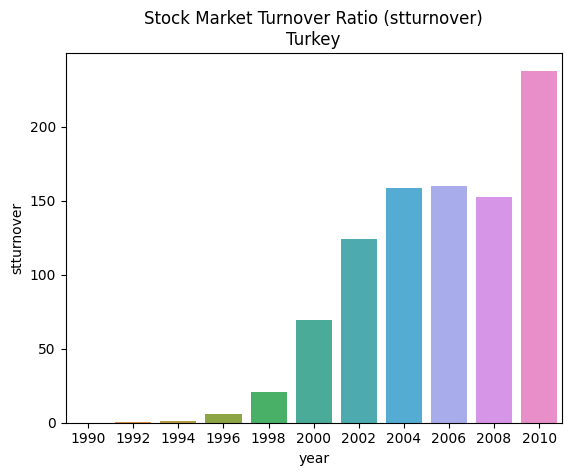

In [59]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Turkey')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Turkey')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Turkey')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nTurkey');

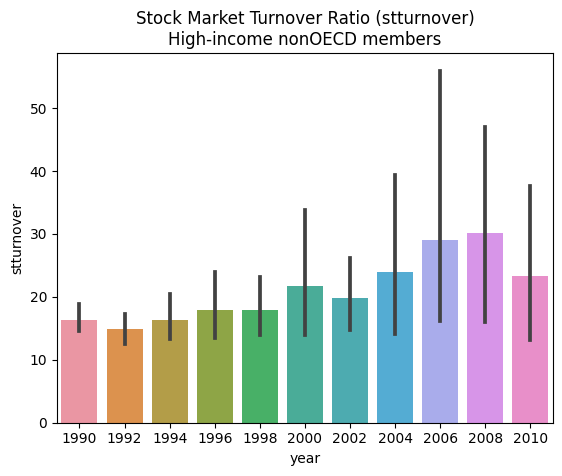

In [60]:
sns.barplot(x=df[['year','region','stturnover']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stturnover']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','region','stturnover']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nHigh-income nonOECD members');

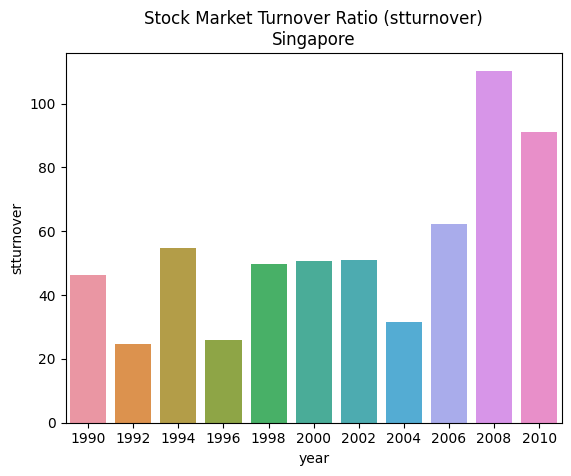

In [61]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Singapore')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Singapore')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Singapore')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nSingapore');

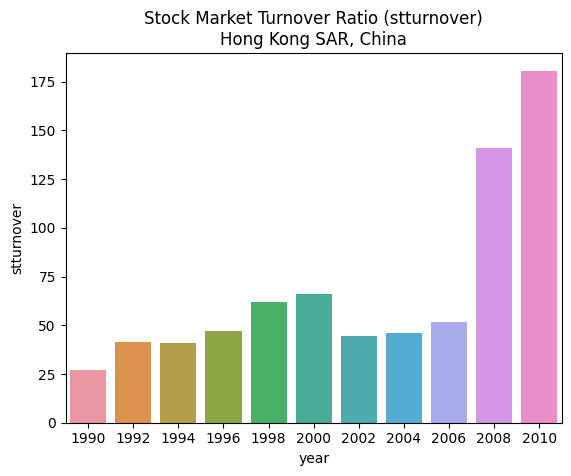

In [62]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Hong Kong SAR, China')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Hong Kong SAR, China')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Hong Kong SAR, China')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nHong Kong SAR, China');

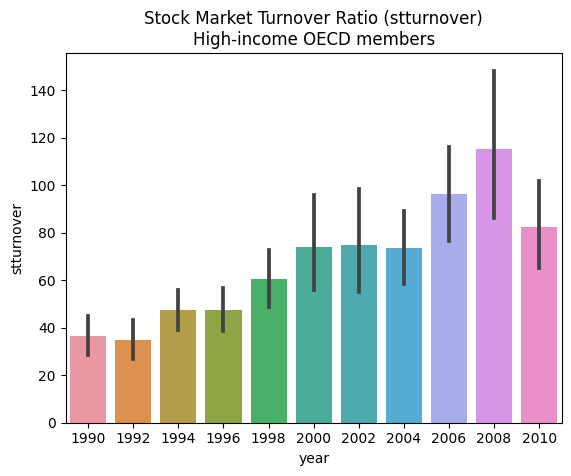

In [63]:
sns.barplot(x=df[['year','region','stturnover']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stturnover']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','region','stturnover']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nHigh-income OECD members');

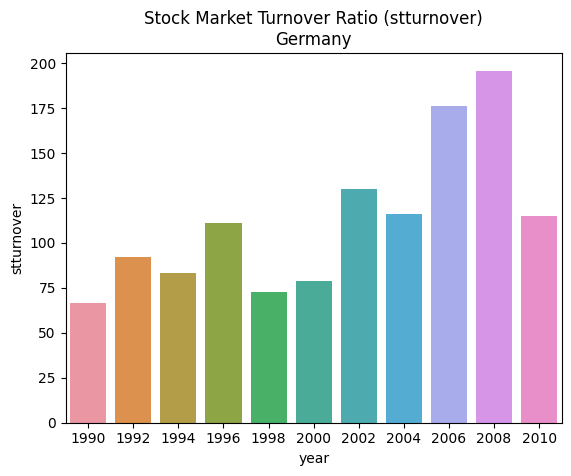

In [64]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Germany')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Germany')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Germany')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nGermany');

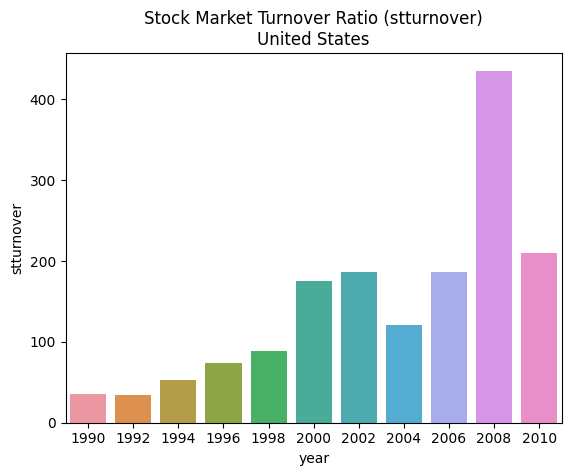

In [65]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='United States')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='United States')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='United States')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nUnited States');

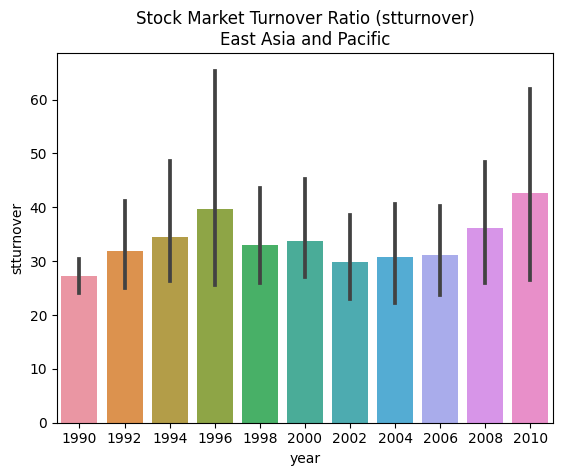

In [66]:
sns.barplot(x=df[['year','region','stturnover']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stturnover']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','region','stturnover']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nEast Asia and Pacific');

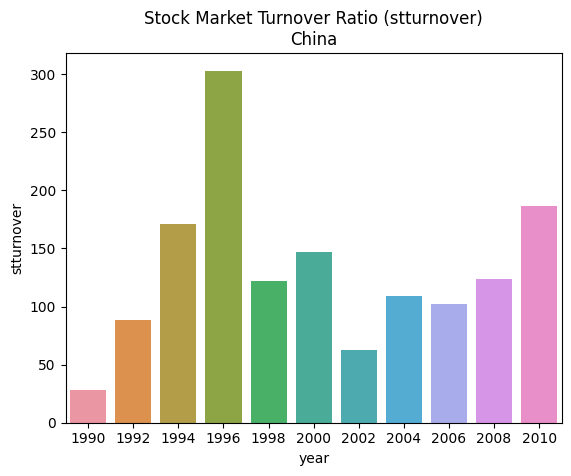

In [67]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='China')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='China')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='China')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nChina');

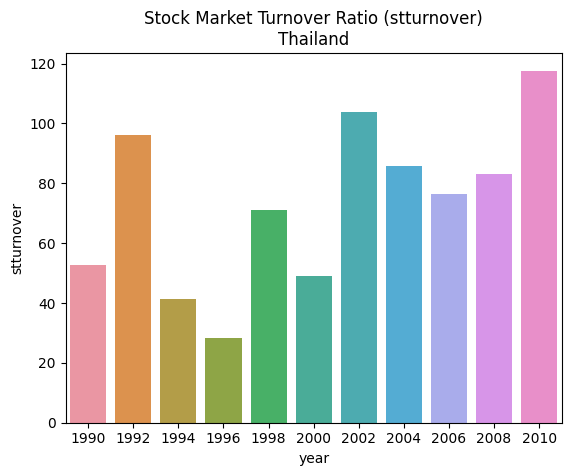

In [68]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Thailand')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Thailand')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Thailand')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nThailand');

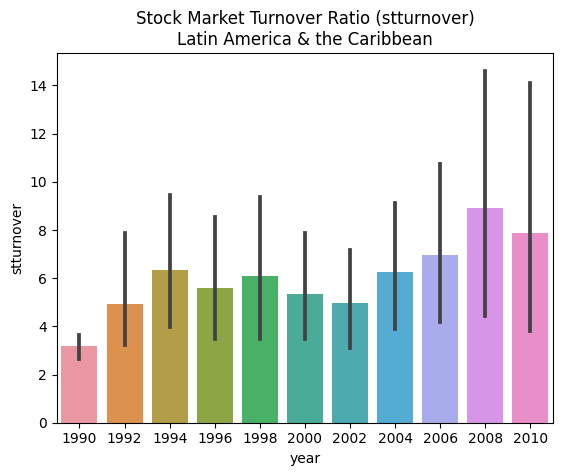

In [69]:
sns.barplot(x=df[['year','region','stturnover']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stturnover']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','region','stturnover']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nLatin America & the Caribbean');

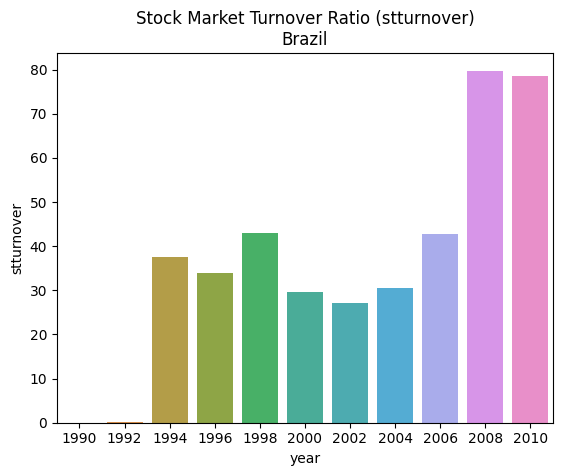

In [70]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Brazil')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Brazil')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Brazil')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nBrazil');

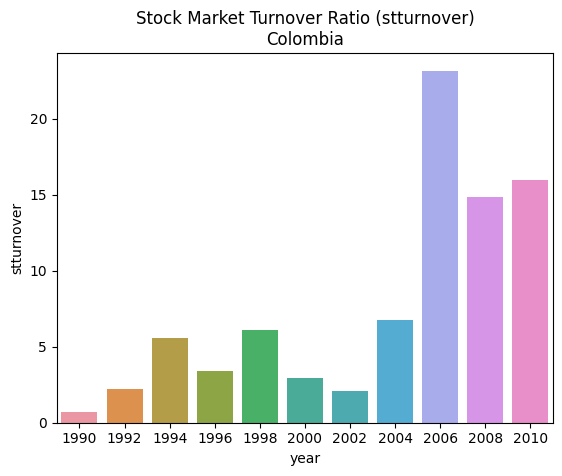

In [71]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Colombia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Colombia')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Colombia')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nColombia');

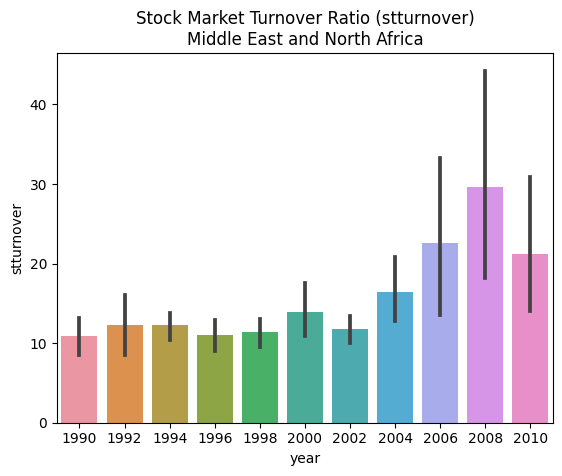

In [72]:
sns.barplot(x=df[['year','region','stturnover']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stturnover']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','region','stturnover']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nMiddle East and North Africa');

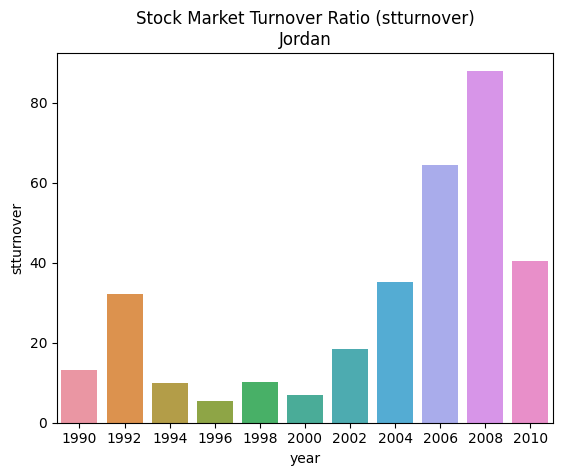

In [73]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Jordan')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Jordan')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Jordan')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nJordan');

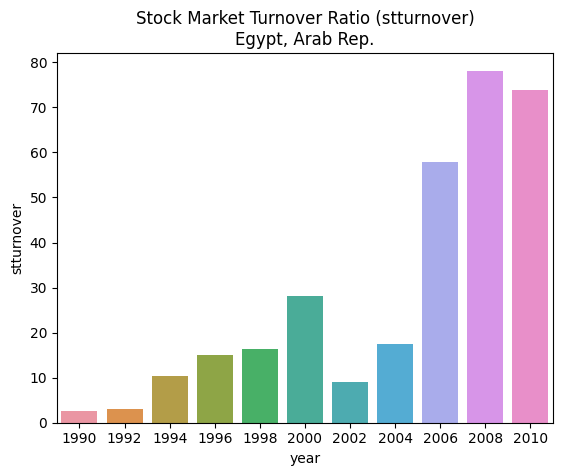

In [74]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Egypt, Arab Rep.')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Egypt, Arab Rep.')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Egypt, Arab Rep.')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nEgypt, Arab Rep.');

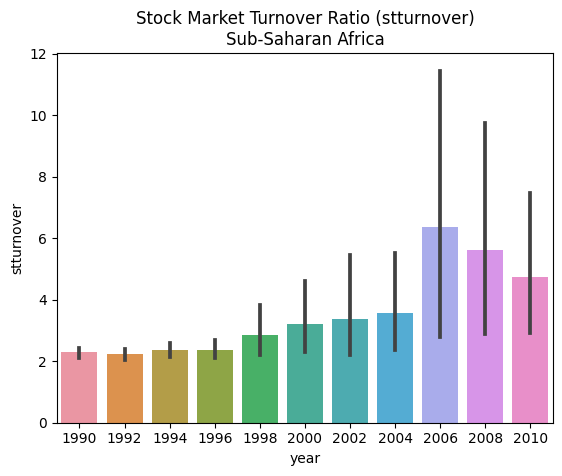

In [75]:
sns.barplot(x=df[['year','region','stturnover']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','stturnover']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','region','stturnover']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nSub-Saharan Africa');

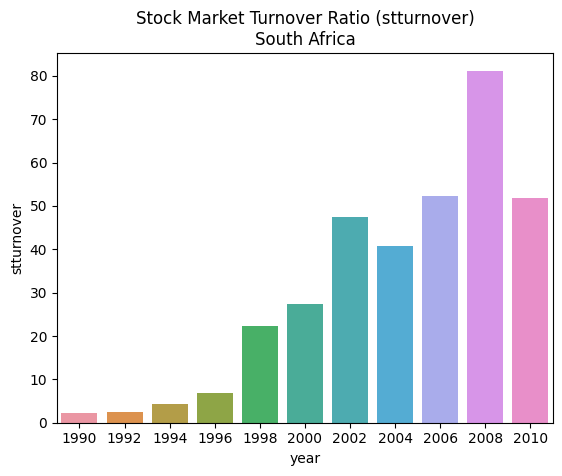

In [76]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='South Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='South Africa')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='South Africa')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nSouth Africa');

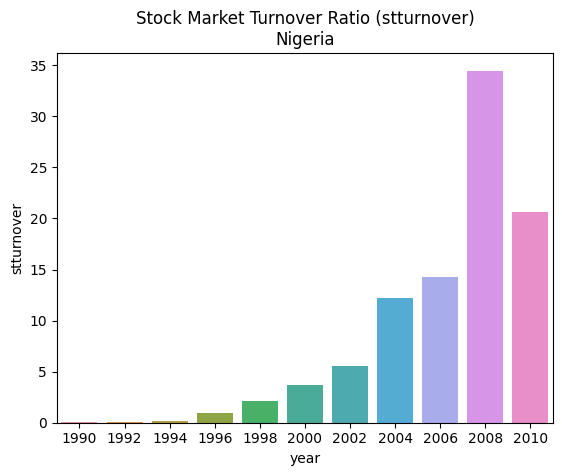

In [77]:
sns.barplot(x=df[['year','cn','stturnover']][(df.cn=='Nigeria')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','stturnover']][(df.cn=='Nigeria')&(df.year >1988)&(df.year%2==0)].stturnover, data=df[['year','cn','stturnover']][(df.cn=='Nigeria')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Stock Market Turnover Ratio (stturnover)\nNigeria');

# Z-Score

A common measure of stability at the level of individual institutions is the z-score. It explicitly compares buffers (capitalization and returns) with risk (volatility of returns) to measure a bank’s solvency risk. The z-score is defined as z ≡ (k+µ)/σ, where k is equity capital as percent of assets, µ is return as percent of assets, and σ is standard deviation of return on assets as a proxy for return volatility. The popularity of the z-score stems from the fact that it has a clear (negative) relationship to the probability of a financial institution’s insolvency, that is, the probability that the value of its assets becomes lower than the value of its debt. A higher z-score therefore implies a lower probability of insolvency. 

source: https://www.worldbank.org/en/publication/gfdr/gfdr-2016/background/financial-stability

In [130]:
df[['incgr','zscore']].groupby(['incgr']).mean()

,zscore
incgr,
High-income OECD members,20.429647
High-income nonOECD members,22.961735
Low-income economies,15.728145
Lower-middle-income economies,17.243984
Upper-middle-income economies,16.598721


In [132]:
df[['incgr','zscore']][df.year==1960].groupby(['incgr']).mean()

,zscore
incgr,
High-income OECD members,20.429647
High-income nonOECD members,22.961735
Low-income economies,15.159879
Lower-middle-income economies,17.087362
Upper-middle-income economies,16.376945


In [131]:
df[['incgr','zscore']][df.year==2010].groupby(['incgr']).mean()

,zscore
incgr,
High-income OECD members,21.039255
High-income nonOECD members,25.477627
Low-income economies,13.195597
Lower-middle-income economies,20.597881
Upper-middle-income economies,19.122526


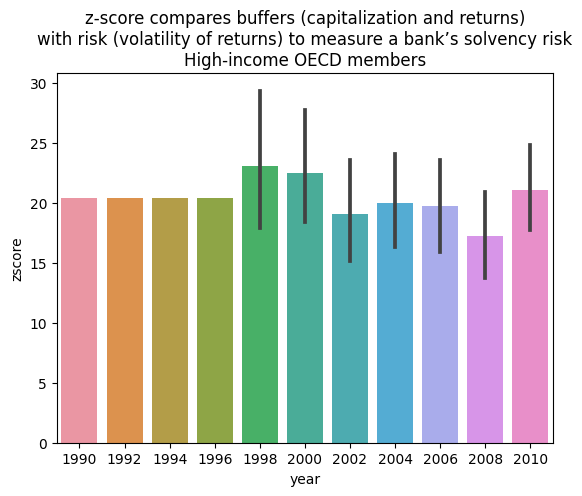

In [78]:
sns.barplot(x=df[['year','region','zscore']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','zscore']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','region','zscore']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nHigh-income OECD members');

Stock Market Turnover Ratio (stturnover) Turnover ratio is the value of domestic shares traded divided by their market capitalization. The value is annualized by multiplying the monthly average by 12.

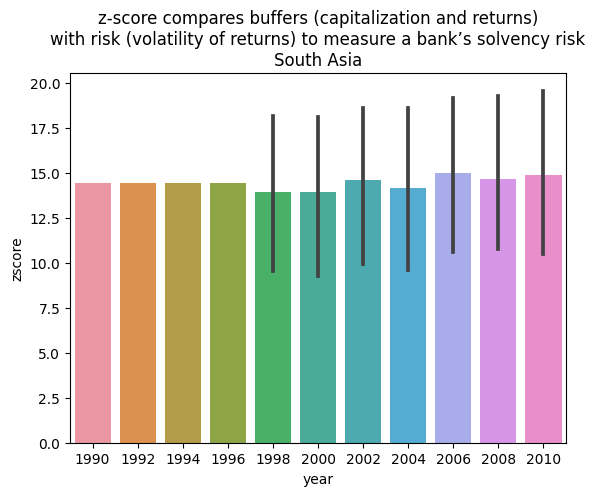

In [79]:
sns.barplot(x=df[['year','region','zscore']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','zscore']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','region','zscore']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nSouth Asia');

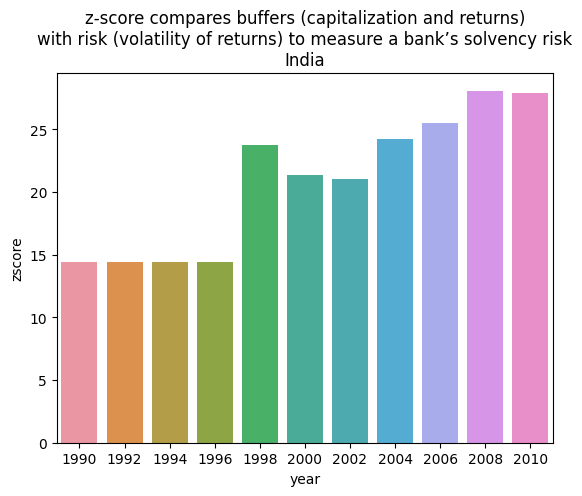

In [80]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='India')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='India')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='India')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nIndia');

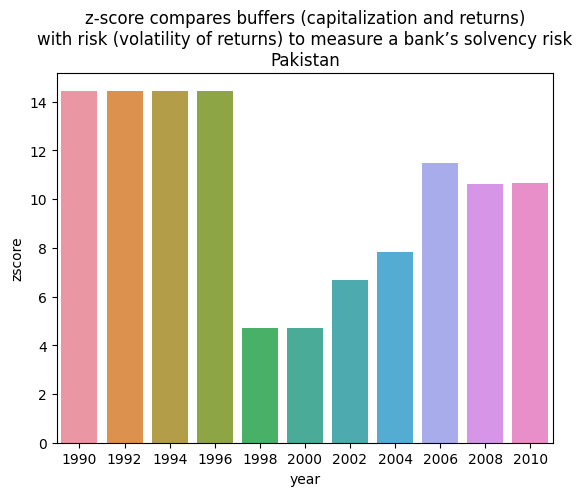

In [81]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Pakistan')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Pakistan')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Pakistan')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nPakistan');

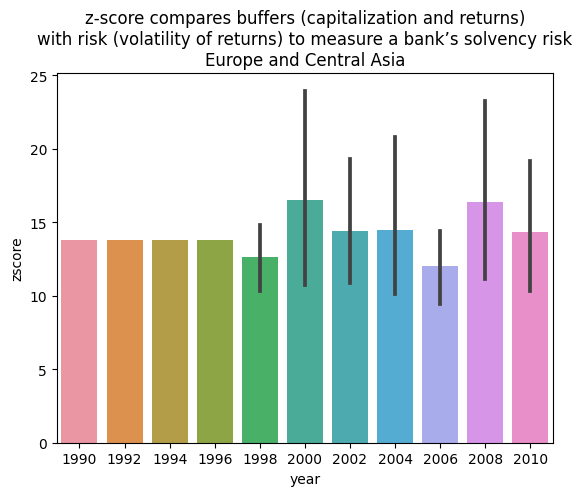

In [82]:
sns.barplot(x=df[['year','region','zscore']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','zscore']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','region','zscore']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nEurope and Central Asia');

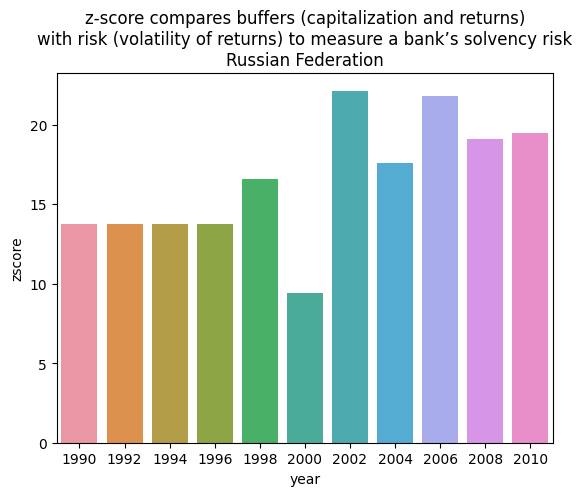

In [83]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Russian Federation')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Russian Federation')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Russian Federation')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nRussian Federation');

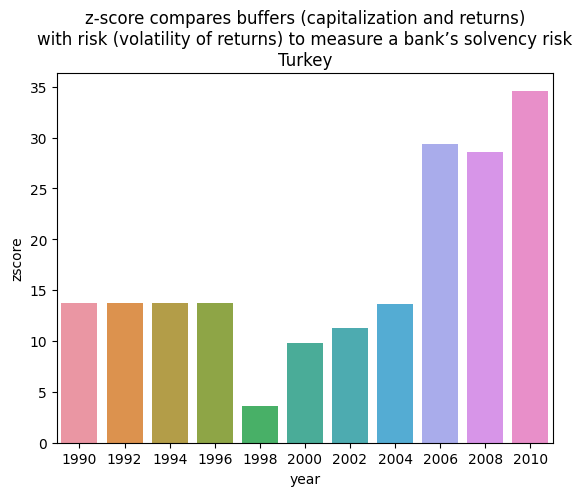

In [84]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Turkey')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Turkey')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Turkey')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nTurkey');

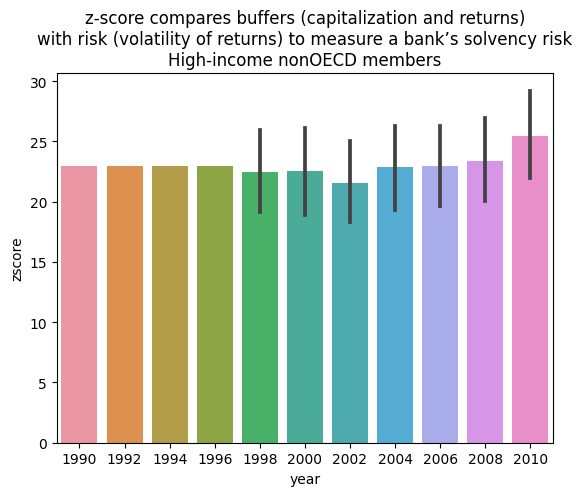

In [85]:
sns.barplot(x=df[['year','region','zscore']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','zscore']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','region','zscore']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nHigh-income nonOECD members');

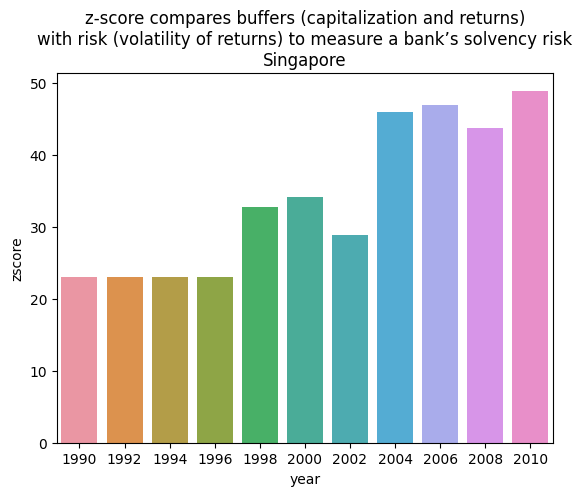

In [86]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Singapore')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Singapore')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Singapore')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nSingapore');

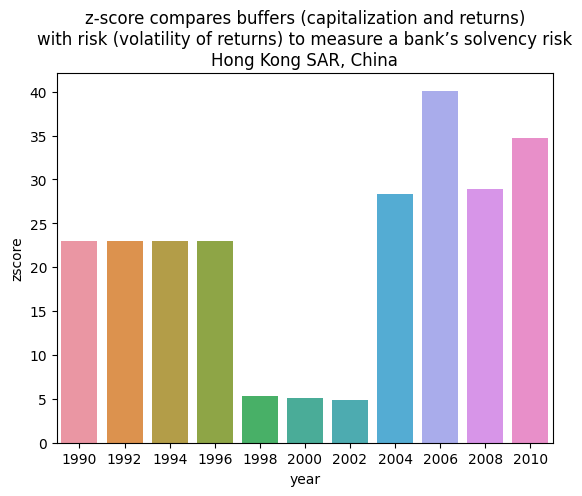

In [87]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Hong Kong SAR, China')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Hong Kong SAR, China')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Hong Kong SAR, China')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nHong Kong SAR, China');

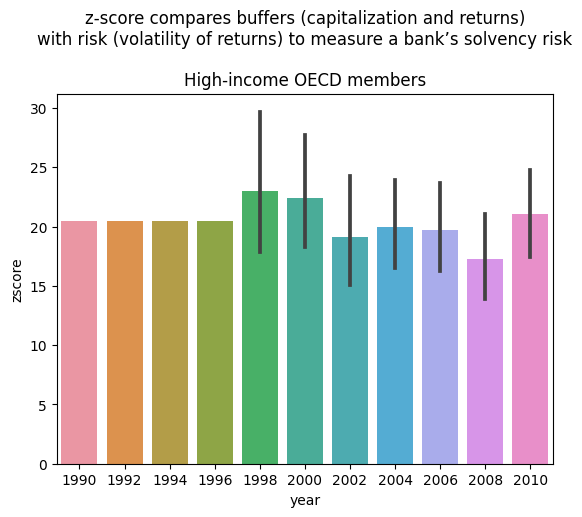

In [88]:
sns.barplot(x=df[['year','region','zscore']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','zscore']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','region','zscore']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\n\nHigh-income OECD members');

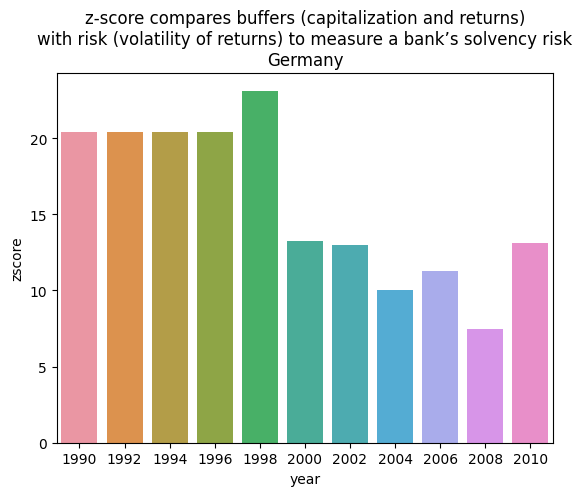

In [89]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Germany')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Germany')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Germany')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nGermany');

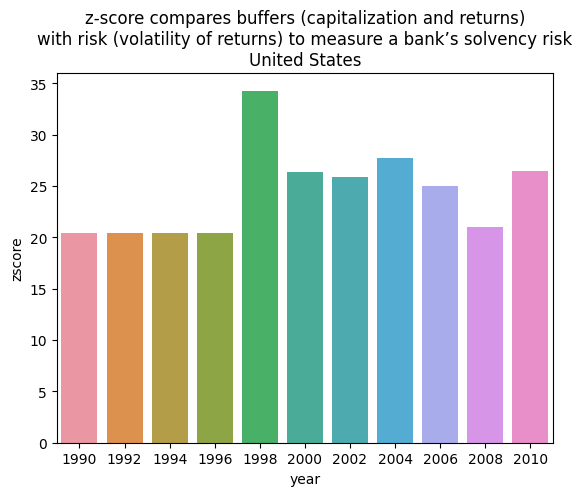

In [90]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='United States')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='United States')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='United States')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nUnited States');

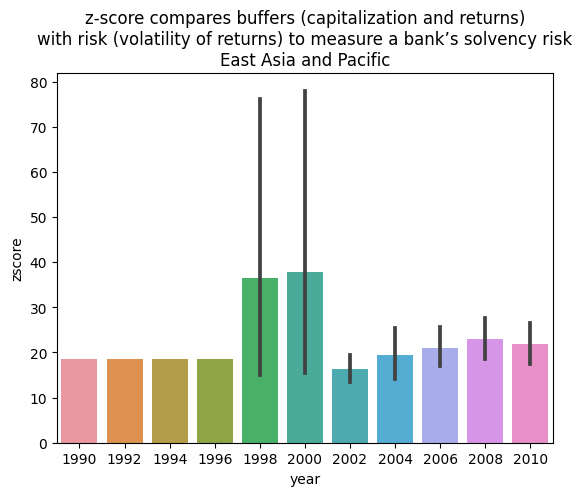

In [91]:
sns.barplot(x=df[['year','region','zscore']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','zscore']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','region','zscore']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nEast Asia and Pacific');

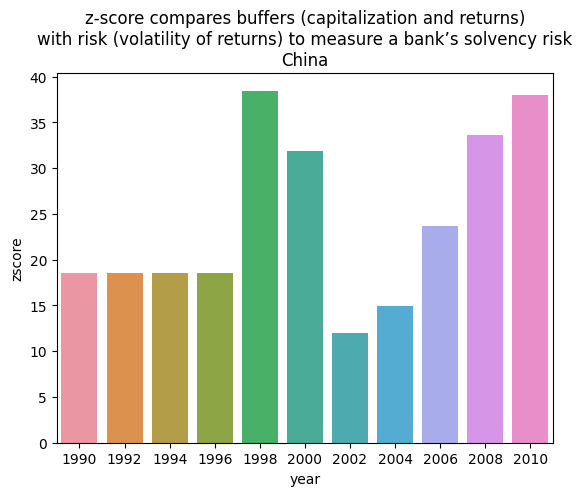

In [92]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='China')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='China')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='China')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nChina');

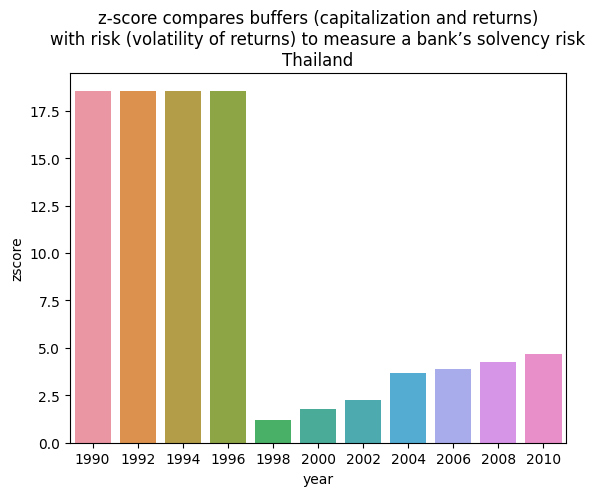

In [93]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Thailand')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Thailand')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Thailand')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nThailand');

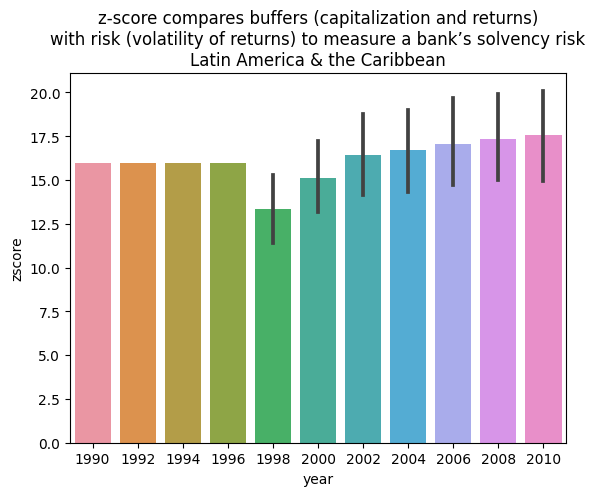

In [94]:
sns.barplot(x=df[['year','region','zscore']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','zscore']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','region','zscore']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nLatin America & the Caribbean');

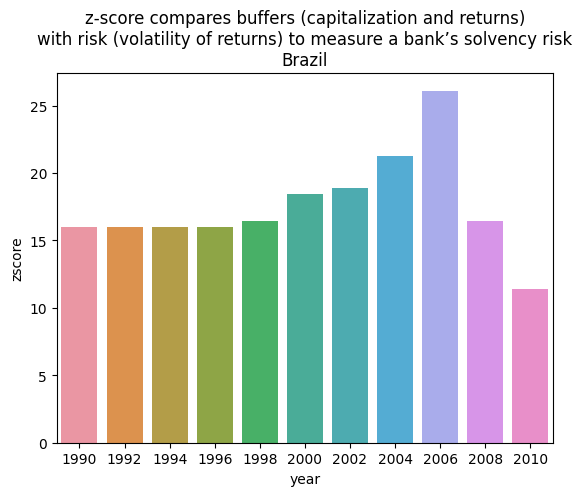

In [95]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Brazil')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Brazil')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Brazil')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nBrazil');

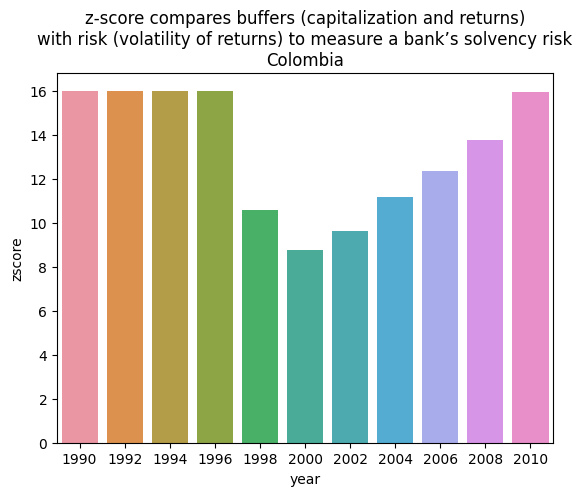

In [96]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Colombia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Colombia')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Colombia')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nColombia');

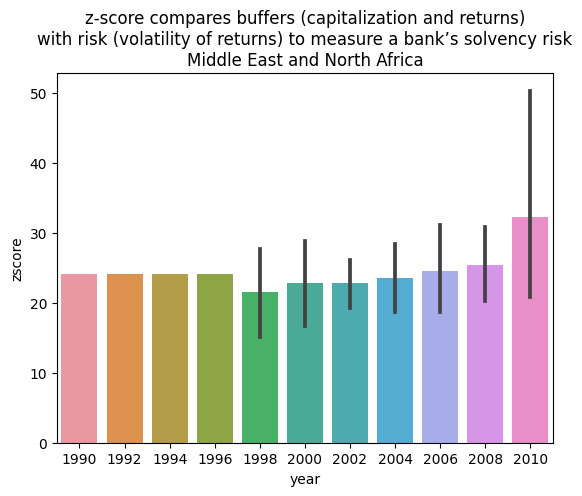

In [97]:
sns.barplot(x=df[['year','region','zscore']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','zscore']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','region','zscore']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nMiddle East and North Africa');

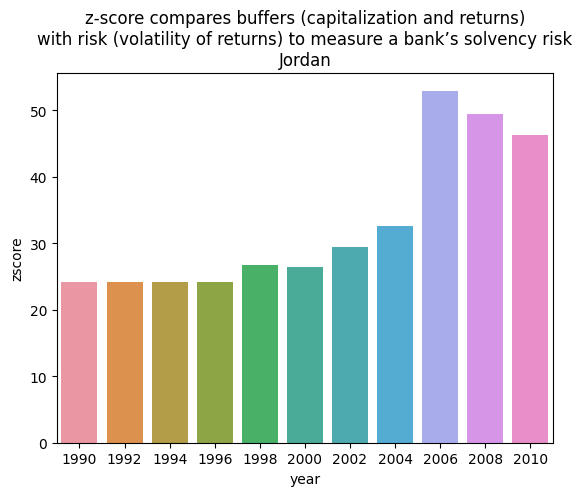

In [98]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Jordan')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Jordan')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Jordan')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nJordan');

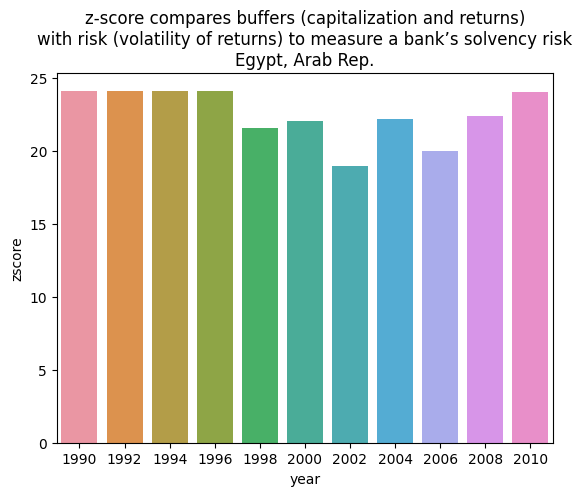

In [99]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Egypt, Arab Rep.')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Egypt, Arab Rep.')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Egypt, Arab Rep.')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nEgypt, Arab Rep.');

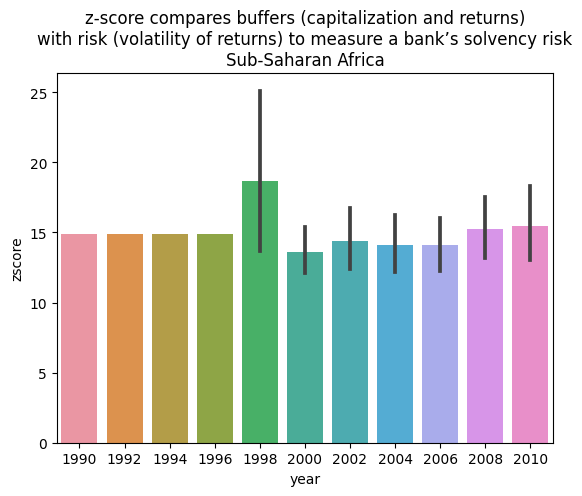

In [100]:
sns.barplot(x=df[['year','region','zscore']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','zscore']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','region','zscore']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nSub-Saharan Africa');

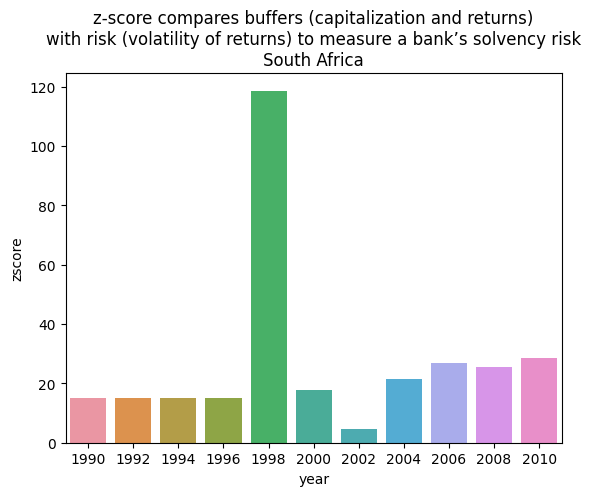

In [101]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='South Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='South Africa')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='South Africa')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nSouth Africa');

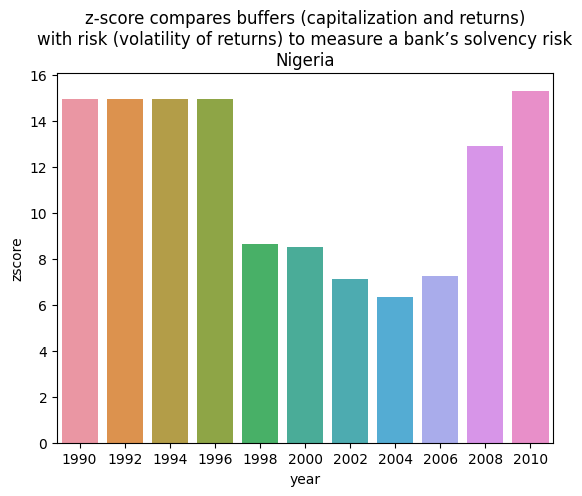

In [102]:
sns.barplot(x=df[['year','cn','zscore']][(df.cn=='Nigeria')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','zscore']][(df.cn=='Nigeria')&(df.year >1988)&(df.year%2==0)].zscore, data=df[['year','cn','zscore']][(df.cn=='Nigeria')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'z-score compares buffers (capitalization and returns)\nwith risk (volatility of returns) to measure a bank’s solvency risk\nNigeria');

# Non-Life Insurance Premium Volume / GDP (insnonlife)

In [134]:
df[['incgr','insnonlife']].groupby(['incgr']).mean()

,insnonlife
incgr,
High-income OECD members,2.979645
High-income nonOECD members,1.892502
Low-income economies,1.532720
Lower-middle-income economies,1.255611
Upper-middle-income economies,1.427089


In [135]:
df[['incgr','insnonlife']][df.year==1960].groupby(['incgr']).mean()

,insnonlife
incgr,
High-income OECD members,2.979645
High-income nonOECD members,1.892502
Low-income economies,1.528306
Lower-middle-income economies,1.277290
Upper-middle-income economies,1.406714


In [136]:
df[['incgr','insnonlife']][df.year==2010].groupby(['incgr']).mean()

,insnonlife
incgr,
High-income OECD members,3.342300
High-income nonOECD members,2.429863
Low-income economies,1.537767
Lower-middle-income economies,1.281442
Upper-middle-income economies,1.514731


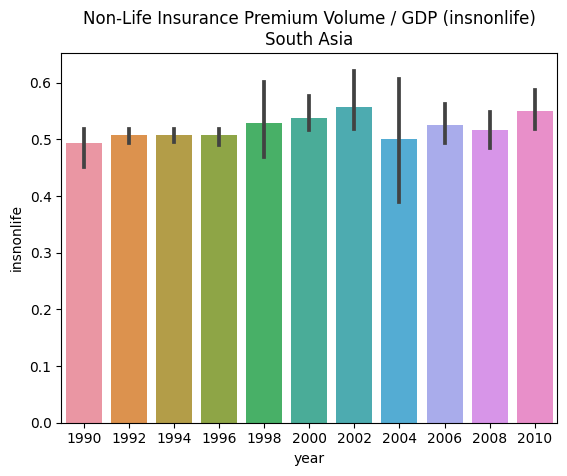

In [105]:
sns.barplot(x=df[['year','region','insnonlife']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','insnonlife']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','region','insnonlife']][(df.region=='South Asia')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nSouth Asia');

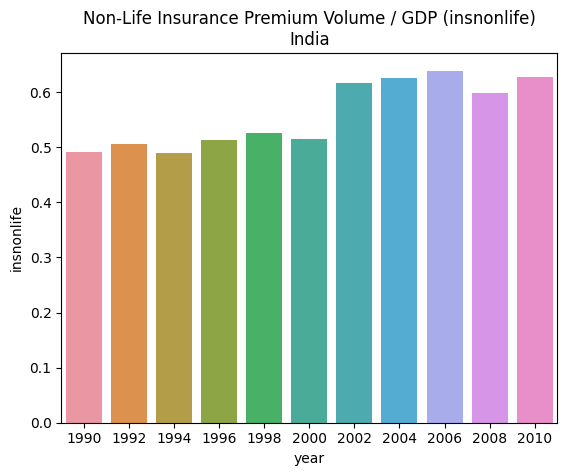

In [106]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='India')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='India')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='India')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nIndia');

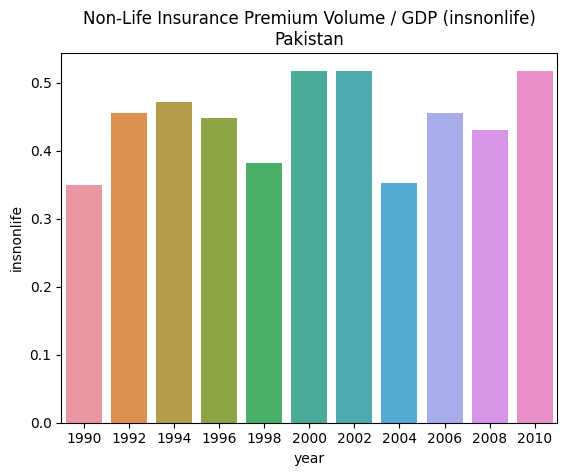

In [107]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Pakistan')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Pakistan')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Pakistan')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nPakistan');

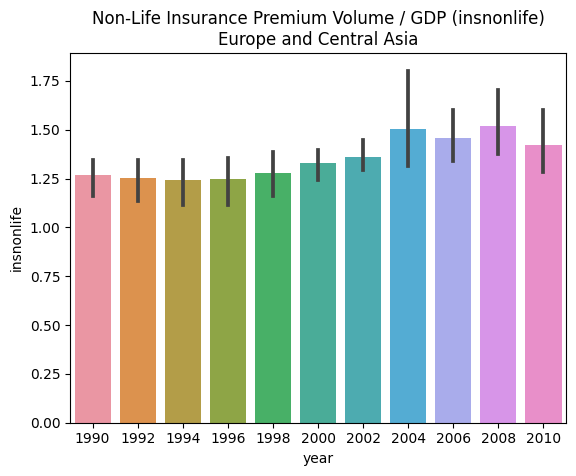

In [108]:
sns.barplot(x=df[['year','region','insnonlife']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','insnonlife']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','region','insnonlife']][(df.region=='Europe and Central Asia')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nEurope and Central Asia');

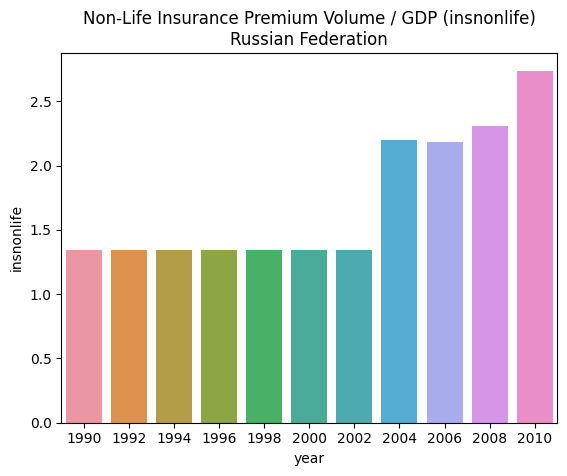

In [109]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Russian Federation')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Russian Federation')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Russian Federation')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nRussian Federation');

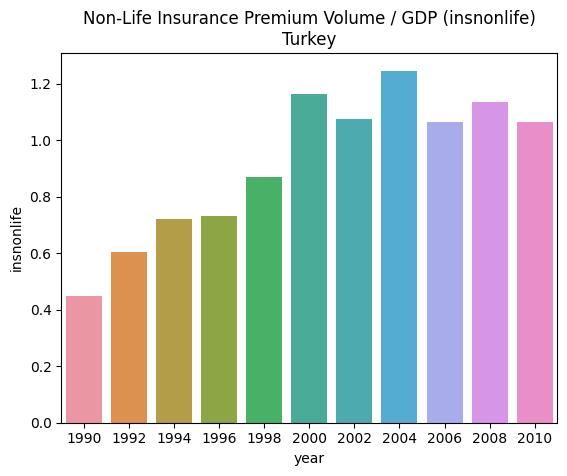

In [110]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Turkey')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Turkey')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Turkey')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nTurkey');

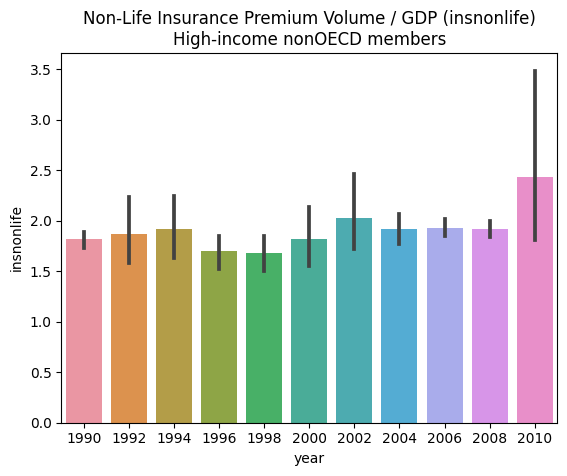

In [111]:
sns.barplot(x=df[['year','region','insnonlife']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','insnonlife']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','region','insnonlife']][(df.region=='High-income nonOECD members')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nHigh-income nonOECD members');

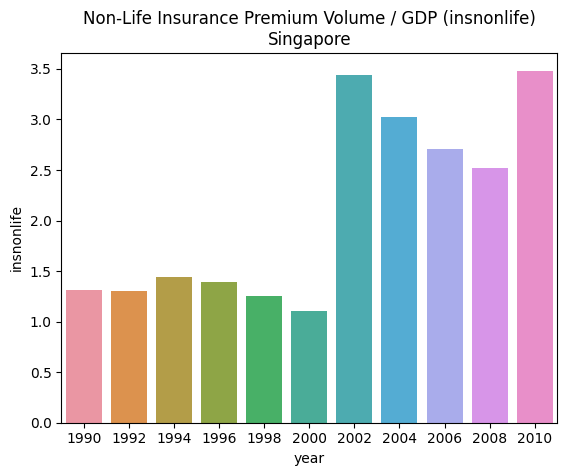

In [112]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Singapore')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Singapore')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Singapore')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nSingapore');

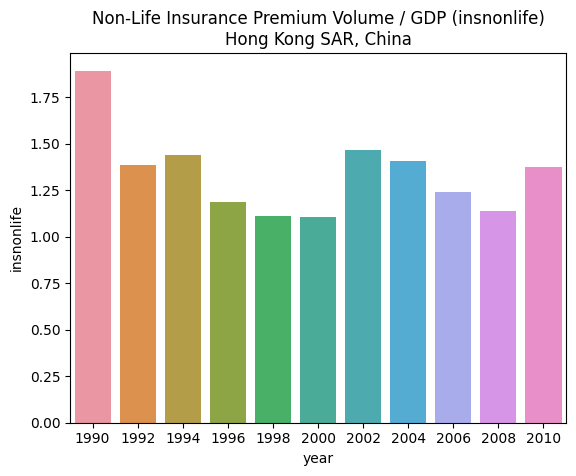

In [113]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Hong Kong SAR, China')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Hong Kong SAR, China')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Hong Kong SAR, China')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nHong Kong SAR, China');

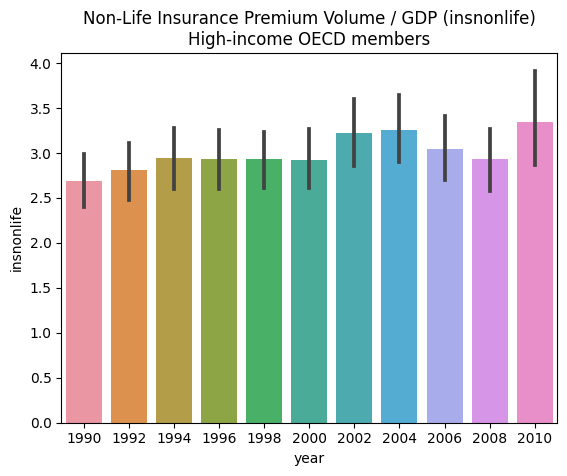

In [114]:
sns.barplot(x=df[['year','region','insnonlife']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','insnonlife']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','region','insnonlife']][(df.region=='High-income OECD members')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nHigh-income OECD members');

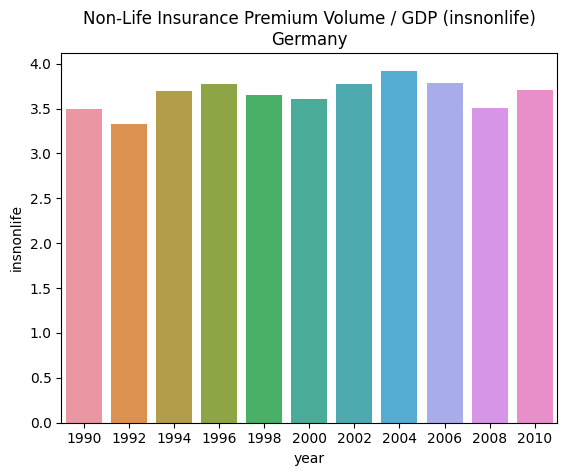

In [115]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Germany')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Germany')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Germany')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nGermany');

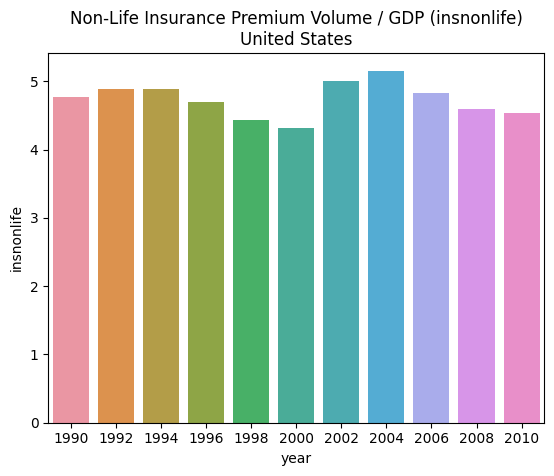

In [116]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='United States')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='United States')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='United States')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nUnited States');

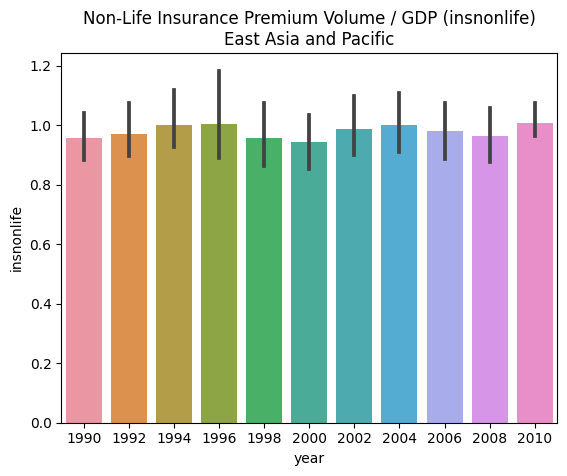

In [117]:
sns.barplot(x=df[['year','region','insnonlife']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','insnonlife']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','region','insnonlife']][(df.region=='East Asia and Pacific')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nEast Asia and Pacific');

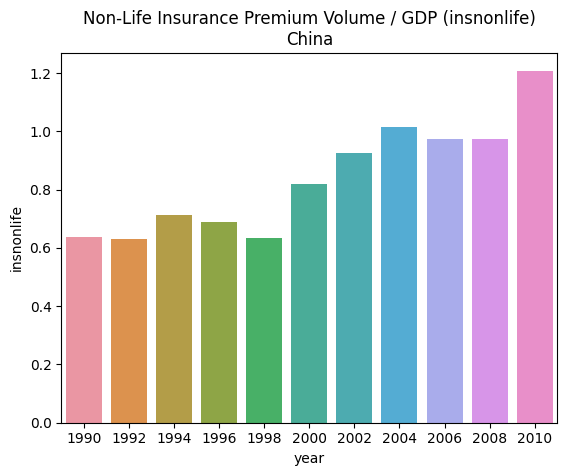

In [118]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='China')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='China')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='China')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nChina');

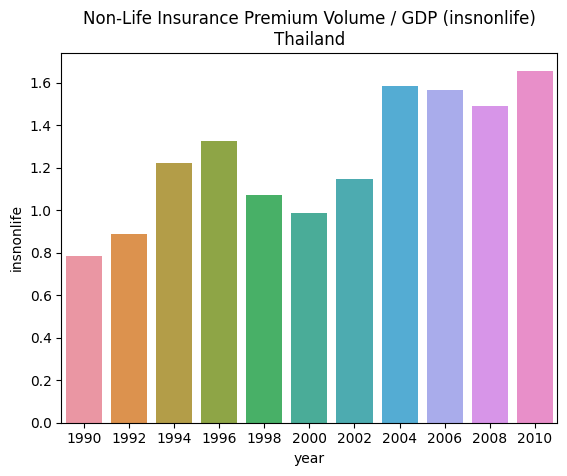

In [119]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Thailand')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Thailand')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Thailand')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nThailand');

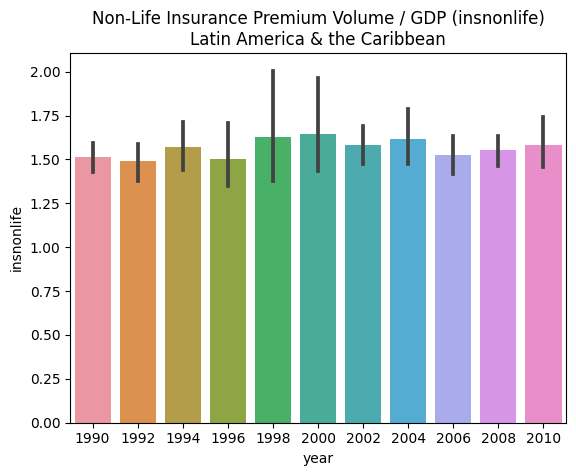

In [120]:
sns.barplot(x=df[['year','region','insnonlife']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','insnonlife']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','region','insnonlife']][(df.region=='Latin America & the Caribbean')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nLatin America & the Caribbean');

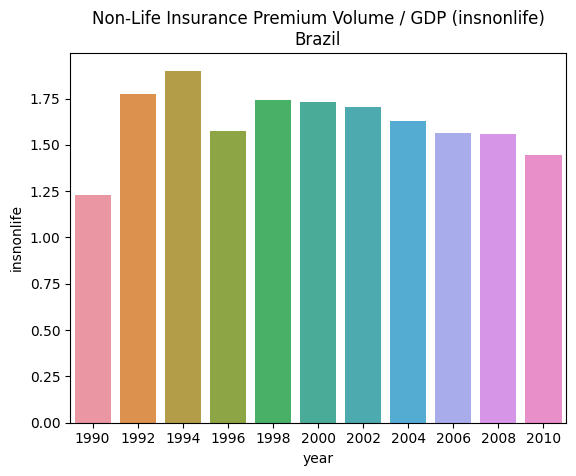

In [121]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Brazil')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Brazil')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Brazil')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nBrazil');

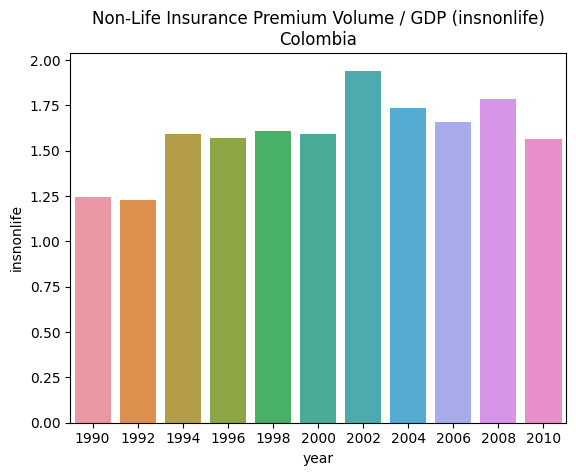

In [122]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Colombia')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Colombia')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Colombia')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nColombia');

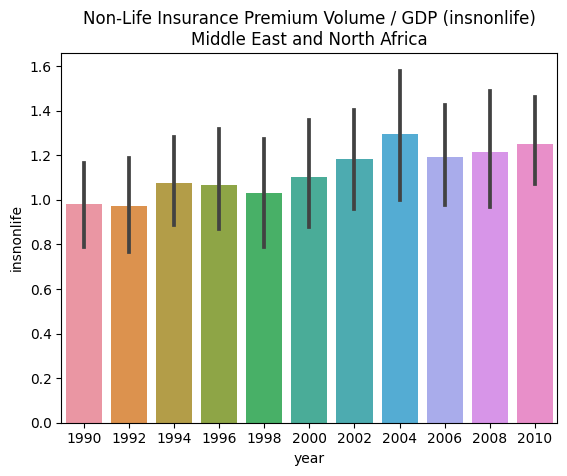

In [123]:
sns.barplot(x=df[['year','region','insnonlife']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','insnonlife']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','region','insnonlife']][(df.region=='Middle East and North Africa')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nMiddle East and North Africa');

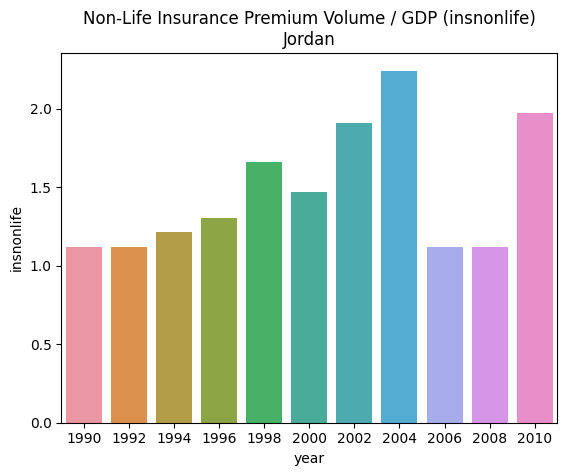

In [125]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Jordan')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Jordan')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Jordan')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nJordan');

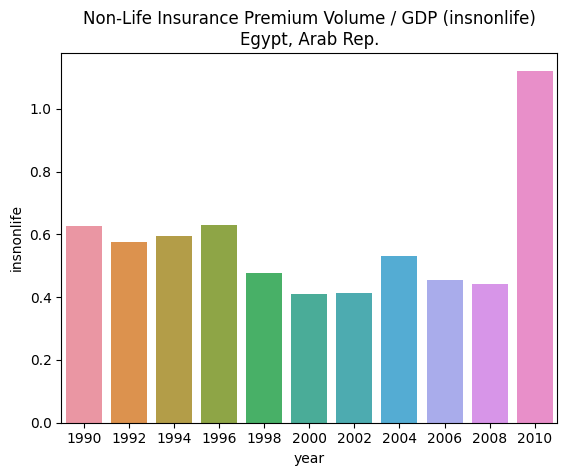

In [126]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Egypt, Arab Rep.')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Egypt, Arab Rep.')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Egypt, Arab Rep.')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nEgypt, Arab Rep.');

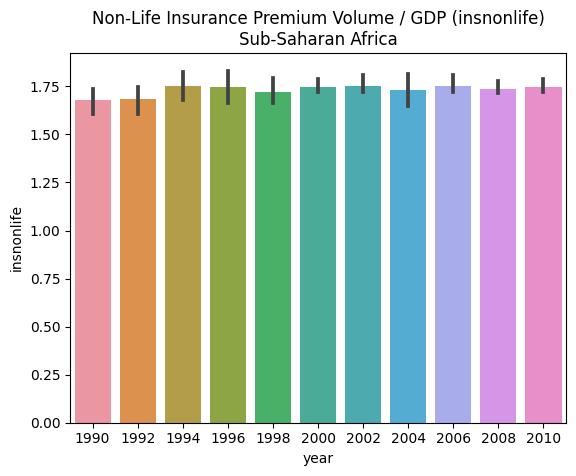

In [127]:
sns.barplot(x=df[['year','region','insnonlife']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','region','insnonlife']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','region','insnonlife']][(df.region=='Sub-Saharan Africa')&(df.year >1988)&(df.year%2==0)].groupby(['region','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nSub-Saharan Africa');

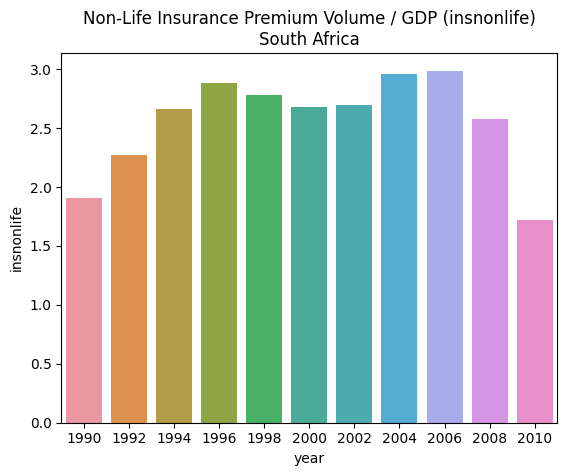

In [128]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='South Africa')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='South Africa')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='South Africa')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nSouth Africa');

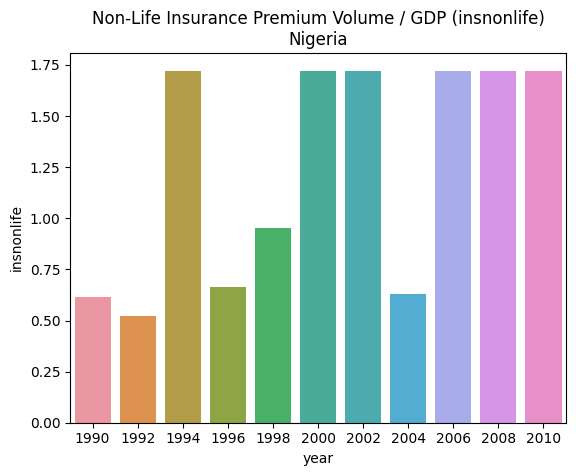

In [129]:
sns.barplot(x=df[['year','cn','insnonlife']][(df.cn=='Nigeria')&(df.year >1988)&(df.year%2==0)].year, y=df[['year','cn','insnonlife']][(df.cn=='Nigeria')&(df.year >1988)&(df.year%2==0)].insnonlife, data=df[['year','cn','insnonlife']][(df.cn=='Nigeria')&(df.year >1988)&(df.year%2==0)].groupby(['cn','year']).mean()).set(title = 'Non-Life Insurance Premium Volume / GDP (insnonlife)\nNigeria');

In [450]:
CompareYear_country.groupby('region').mean()

,year,dbacba,llgdp,cbagdp,dbagdp,ofagdp,pcrdbgdp,pcrdbofgdp,bdgdp,fdgdp,...,stvaltraded,stturnover,listco_pc,prbond,pubond,intldebt,intldebtnet,nrbloan,offdep,remit
region,,,,,,,,,,,,,,,,,,,,,
East Asia and Pacific,1985.0,85.607399,45.236450,2.980177,44.607372,7.075406,31.891024,33.659546,25.885059,25.790426,...,17.355711,35.492840,0.065795,8.496454,24.475025,4.348410,0.236696,382.068107,6.297297,2.776150
Europe and Central Asia,1985.0,85.967957,34.779003,2.663252,37.165245,1.363748,24.922758,28.622593,20.456362,20.476988,...,3.401300,18.306103,0.140260,0.123580,8.578499,6.988488,0.713937,9.216815,11.417379,5.371867
High-income OECD members,1985.0,90.223892,83.167336,3.852082,93.755844,27.627050,78.151947,86.900627,73.304543,73.282913,...,40.580616,74.323280,0.269837,43.405659,41.586796,51.827785,1.315077,57.234756,8.826310,0.609821
High-income nonOECD members,1985.0,93.626518,84.264305,2.125505,73.632141,9.736789,62.829224,68.989372,73.584343,74.886780,...,21.571947,19.292910,0.506592,13.133795,16.947361,15.497765,1.440081,166.527850,49.416625,1.243425
Latin America & the Caribbean,1985.0,81.247978,43.009399,5.373232,38.562717,3.019064,31.645308,32.904736,26.024818,26.239071,...,2.268847,5.720953,0.087941,4.548203,18.349033,10.017033,0.511482,22.076024,43.048719,3.855259
Middle East and North Africa,1985.0,81.727768,60.706158,8.808086,43.128090,6.251551,24.410948,26.592808,41.885338,43.659004,...,6.043368,17.185038,0.062879,5.989453,77.989746,5.475675,1.522827,8.461622,14.407813,5.042870
South Asia,1985.0,70.006561,43.670818,8.089540,34.529278,1.504796,25.521069,25.758738,28.300079,28.424137,...,7.914411,42.212109,0.057976,1.168136,28.499601,1.782975,0.370170,6.967208,4.189314,4.765754
Sub-Saharan Africa,1985.0,74.626106,29.321907,4.918292,22.743862,3.568030,17.388010,16.642323,18.497110,18.545935,...,1.723754,3.598862,0.030828,14.175002,41.417820,5.691954,0.259502,36.798040,42.272143,2.051065


In [449]:
df[['year','region','intldebt']][(df.region=='High-income OECD members')&(df.year%5==0)]

,year,region,intldebt
459,1960,High-income OECD members,21.2202
464,1965,High-income OECD members,21.2202
469,1970,High-income OECD members,21.2202
474,1975,High-income OECD members,21.2202
479,1980,High-income OECD members,21.2202
...,...,...,...
9822,1990,High-income OECD members,3.12643
9827,1995,High-income OECD members,3.63081
9832,2000,High-income OECD members,17.3838
9837,2005,High-income OECD members,28.3696
